<a href="https://colab.research.google.com/github/daneeeeeee/CMSC197_MiniProject/blob/main/CMSC197-MiniProject/CMSC197.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **A Multi-model Approach To Flood Prediction: Comparing Different Machine Learning Regression Models**



*   Adricula, Briana Jade
*   Detablan, Arianne Deaniele
*   Tuando, Sharah Michelle

CMSC 197 - Machine Learning

***Some pictures are not visible, kindly check the pdf file in this folder to view it.***



In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve, classification_report
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.model_selection import GridSearchCV

# XGBoost
from xgboost import XGBRegressor
import plotly.express as px
import plotly.graph_objs as go
import joblib
import xgboost as xgb

# Models
from sklearn.linear_model import LogisticRegression

# RF
from sklearn.ensemble import RandomForestRegressor

# DT
from sklearn.tree import DecisionTreeRegressor

# KNN
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance

# SVR
from sklearn.svm import SVR

# Linear Regression
from sklearn.linear_model import LinearRegression

# ANN
from sklearn.neural_network import MLPRegressor

In [ ]:
url = "https://raw.githubusercontent.com/daneeeeeee/CMSC197_MiniProject/main/dataset/flood.csv"

In [ ]:
# Load the flood dataset
production_data = pd.read_csv(url)
production_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   MonsoonIntensity                 50000 non-null  int64  
 1   TopographyDrainage               50000 non-null  int64  
 2   RiverManagement                  50000 non-null  int64  
 3   Deforestation                    50000 non-null  int64  
 4   Urbanization                     50000 non-null  int64  
 5   ClimateChange                    50000 non-null  int64  
 6   DamsQuality                      50000 non-null  int64  
 7   Siltation                        50000 non-null  int64  
 8   AgriculturalPractices            50000 non-null  int64  
 9   Encroachments                    50000 non-null  int64  
 10  IneffectiveDisasterPreparedness  50000 non-null  int64  
 11  DrainageSystems                  50000 non-null  int64  
 12  CoastalVulnerabili

In [ ]:
production_data.head()

MonsoonIntensity  TopographyDrainage  RiverManagement  Deforestation  \
0                 3                   8                6              6   
1                 8                   4                5              7   
2                 3                  10                4              1   
3                 4                   4                2              7   
4                 3                   7                5              2   

   Urbanization  ClimateChange  DamsQuality  Siltation  AgriculturalPractices  \
0             4              4            6          2                      3   
1             7              9            1          5                      5   
2             7              5            4          7                      4   
3             3              4            1          4                      6   
4             5              8            5          2                      7   

   Encroachments  ...  DrainageSystems  CoastalVulnerability  Landslides  \
0              2  ...               10                     7           4   
1              4  ...                9                     2           6   
2              9  ...                7                     4           4   
3              4  ...                4                     2           6   
4              5  ...                7                     6           5   

   Watersheds  DeterioratingInfrastructure  PopulationScore  WetlandLoss  \
0           2                            3                4            3   
1           2                            1                1            9   
2           8                            6                1            8   
3           6                            8                8            6   
4           3                            3                4            4   

   InadequatePlanning  PoliticalFactors  FloodProbability  
0                   2                 6             0.450  
1                   1                 3             0.475  
2                   3                 6             0.515  
3                   6                10             0.520  
4                   3                 4             0.475  

[5 rows x 21 columns]

In [ ]:
def get_df_info(df):
    print("\n\033[1mShape of DataFrame:\033[0m ", df.shape)
    print("\n\033[1mColumns in DataFrame:\033[0m ", df.columns.to_list())
    print("\n\033[1mData types of columns:\033[0m\n", df.dtypes)

    print("\n\033[1mInformation about DataFrame:\033[0m")
    df.info()

    print("\n\033[1mNumber of unique values in each column:\033[0m")
    for col in df.columns:
        print(f"\033[1m{col}\033[0m: {df[col].nunique()}")

    print("\n\033[1mNull values in columns:\033[0m")
    null_counts = df.isnull().sum()
    null_columns = null_counts[null_counts > 0]
    if len(null_columns) > 0:
        for col, count in null_columns.items():
            print(f"\033[1m{col}\033[0m: {count}")
    else:
        print("There are no null values in the DataFrame.")

    print("\n\033[1mNumber of duplicate rows:\033[0m ", df.duplicated().sum())

    print("\n\033[1mDescriptive statistics of DataFrame:\033[0m\n",)
    return df.describe().transpose()

# Call the function
get_df_info(production_data)


Shape of DataFrame:  (50000, 21)

Columns in DataFrame:  ['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement', 'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality', 'Siltation', 'AgriculturalPractices', 'Encroachments', 'IneffectiveDisasterPreparedness', 'DrainageSystems', 'CoastalVulnerability', 'Landslides', 'Watersheds', 'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss', 'InadequatePlanning', 'PoliticalFactors', 'FloodProbability']

Data types of columns:
 MonsoonIntensity                     int64
TopographyDrainage                   int64
RiverManagement                      int64
Deforestation                        int64
Urbanization                         int64
ClimateChange                        int64
DamsQuality                          int64
Siltation                            int64
AgriculturalPractices                int64
Encroachments                        int64
IneffectiveDisasterPreparedness      int64
DrainageSystems              

count     mean       std    min    25%  \
MonsoonIntensity                 50000.0  4.99148  2.236834  0.000  3.000   
TopographyDrainage               50000.0  4.98410  2.246488  0.000  3.000   
RiverManagement                  50000.0  5.01594  2.231310  0.000  3.000   
Deforestation                    50000.0  5.00848  2.222743  0.000  3.000   
Urbanization                     50000.0  4.98906  2.243159  0.000  3.000   
ClimateChange                    50000.0  4.98834  2.226761  0.000  3.000   
DamsQuality                      50000.0  5.01536  2.245000  0.000  3.000   
Siltation                        50000.0  4.98860  2.232642  0.000  3.000   
AgriculturalPractices            50000.0  5.00612  2.234588  0.000  3.000   
Encroachments                    50000.0  5.00638  2.241633  0.000  3.000   
IneffectiveDisasterPreparedness  50000.0  5.00502  2.226076  0.000  3.000   
DrainageSystems                  50000.0  5.00606  2.238107  0.000  3.000   
CoastalVulnerability             50000.0  4.99992  2.247101  0.000  3.000   
Landslides                       50000.0  4.98422  2.227741  0.000  3.000   
Watersheds                       50000.0  4.97982  2.232190  0.000  3.000   
DeterioratingInfrastructure      50000.0  4.98820  2.231134  0.000  3.000   
PopulationScore                  50000.0  4.98498  2.238279  0.000  3.000   
WetlandLoss                      50000.0  5.00512  2.231760  0.000  3.000   
InadequatePlanning               50000.0  4.99436  2.230011  0.000  3.000   
PoliticalFactors                 50000.0  4.99052  2.246075  0.000  3.000   
FloodProbability                 50000.0  0.49966  0.050034  0.285  0.465   

                                 50%    75%     max  
MonsoonIntensity                 5.0  6.000  16.000  
TopographyDrainage               5.0  6.000  18.000  
RiverManagement                  5.0  6.000  16.000  
Deforestation                    5.0  6.000  17.000  
Urbanization                     5.0  6.000  17.000  
ClimateChange                    5.0  6.000  17.000  
DamsQuality                      5.0  6.000  16.000  
Siltation                        5.0  6.000  16.000  
AgriculturalPractices            5.0  6.000  16.000  
Encroachments                    5.0  6.000  18.000  
IneffectiveDisasterPreparedness  5.0  6.000  16.000  
DrainageSystems                  5.0  6.000  17.000  
CoastalVulnerability             5.0  6.000  17.000  
Landslides                       5.0  6.000  16.000  
Watersheds                       5.0  6.000  16.000  
DeterioratingInfrastructure      5.0  6.000  17.000  
PopulationScore                  5.0  6.000  19.000  
WetlandLoss                      5.0  6.000  22.000  
InadequatePlanning               5.0  6.000  16.000  
PoliticalFactors                 5.0  6.000  16.000  
FloodProbability                 0.5  0.535   0.725

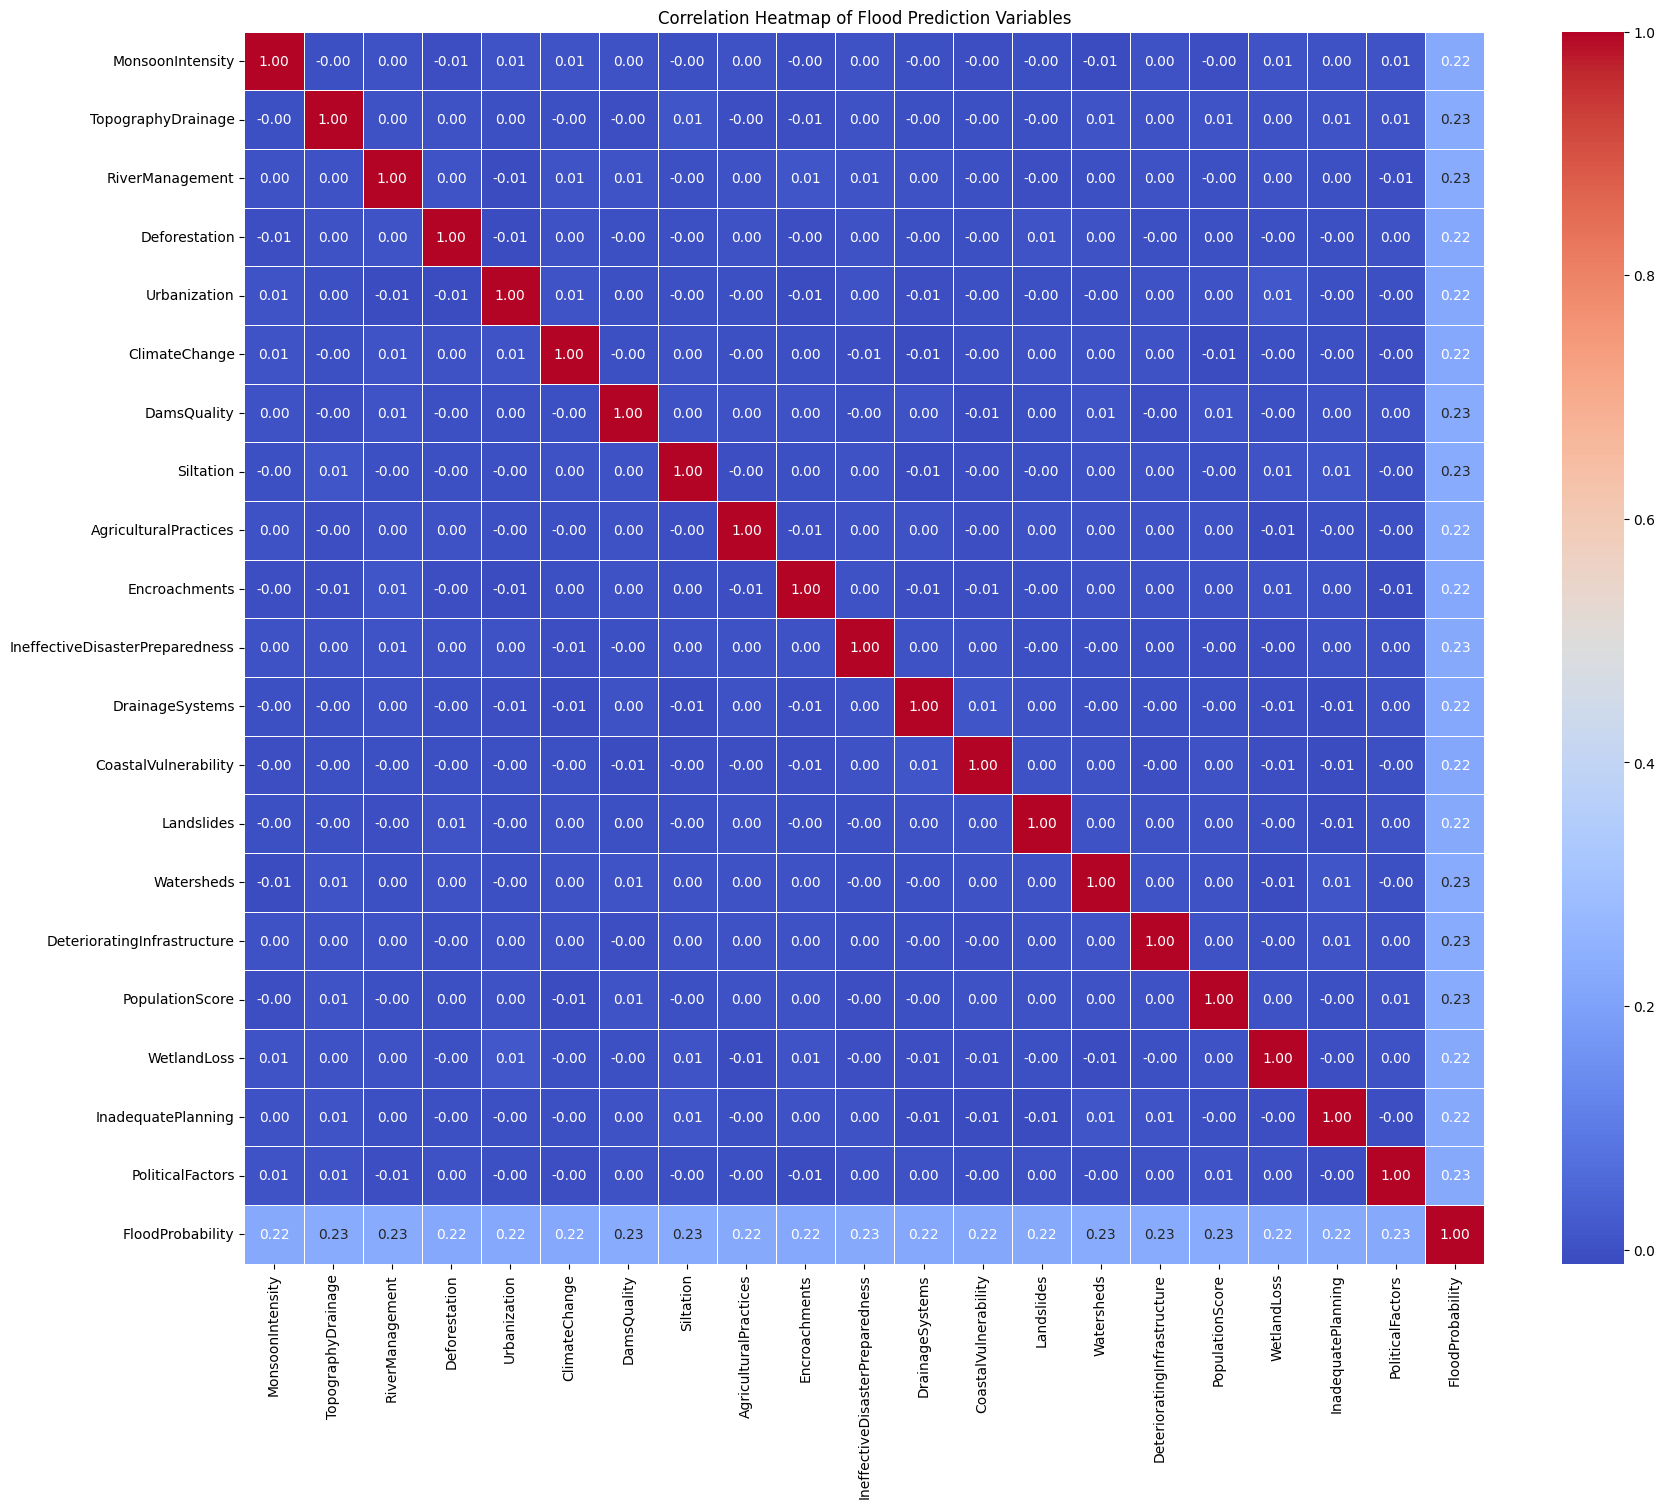

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(production_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Heatmap of Flood Prediction Variables')
plt.show()

In [ ]:
# Correlation with Flood Probability
correlations = production_data.corr()['FloodProbability'].sort_values(ascending=False)
print("Correlations with Flood Probability:")
print(correlations)

Correlations with Flood Probability:
FloodProbability                   1.000000
DeterioratingInfrastructure        0.229444
TopographyDrainage                 0.229414
RiverManagement                    0.228917
Watersheds                         0.228152
DamsQuality                        0.227467
PopulationScore                    0.226928
Siltation                          0.226544
IneffectiveDisasterPreparedness    0.225126
PoliticalFactors                   0.225009
MonsoonIntensity                   0.224081
WetlandLoss                        0.223732
InadequatePlanning                 0.223329
Landslides                         0.222991
AgriculturalPractices              0.221846
ClimateChange                      0.220986
Urbanization                       0.220867
Deforestation                      0.220237
Encroachments                      0.218259
DrainageSystems                    0.217895
CoastalVulnerability               0.215187
Name: FloodProbability, dtype: float64


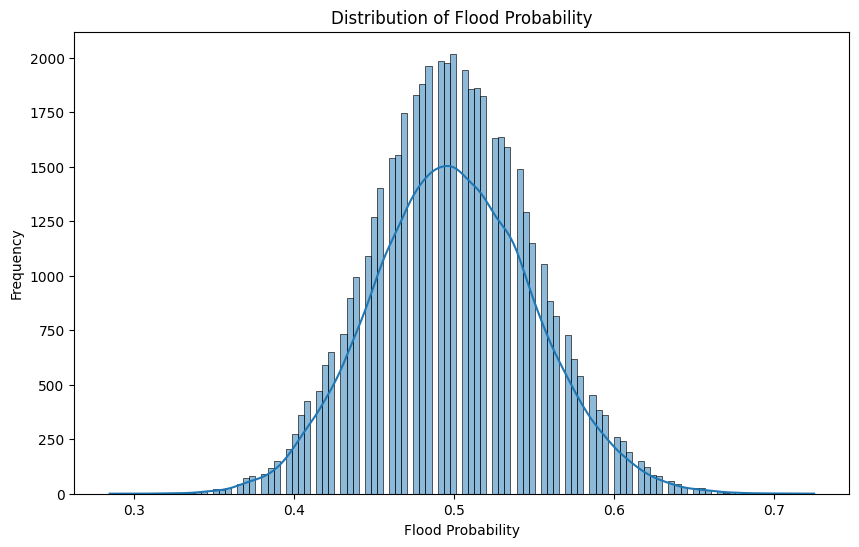

In [ ]:
# Distribution of Flood Probability
plt.figure(figsize=(10, 6))
sns.histplot(production_data['FloodProbability'], kde=True)
plt.title('Distribution of Flood Probability')
plt.xlabel('Flood Probability')
plt.ylabel('Frequency')
plt.show()

# **XGBoost Regressor with Cross-Validation**

In [ ]:
# Separate features and target
X = production_data.drop('FloodProbability', axis=1)
y = production_data['FloodProbability']

In [ ]:
# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Data Shape: X_train: {X_train.shape}, Y_train: {Y_train.shape}")
print(f"Testing Data Shape: X_test: {X_test.shape}, Y_test: {Y_test.shape}")

# Instantiate the XGBoost model
xgb_model = XGBRegressor(random_state=42)

Training Data Shape: X_train: (40000, 20), Y_train: (40000,)
Testing Data Shape: X_test: (10000, 20), Y_test: (10000,)


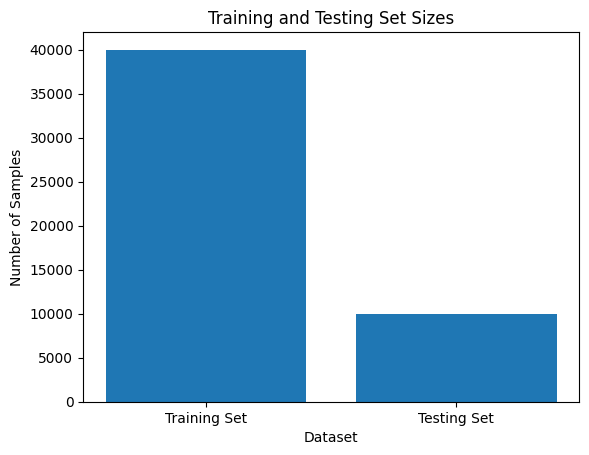

In [ ]:
# Get the sizes of the training and testing sets
train_size = X_train.shape[0]
test_size = X_test.shape[0]

# Create a bar plot
plt.bar(['Training Set', 'Testing Set'], [train_size, test_size])

# Add labels and title
plt.xlabel('Dataset')
plt.ylabel('Number of Samples')
plt.title('Training and Testing Set Sizes')

# Show the plot
plt.show()

In [ ]:
# Define 10-Fold Cross-Validation on training data
kf = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(xgb_model, X_train, Y_train, cv=kf, scoring='neg_mean_squared_error')
cv_mse = -cv_scores

# Print mean and standard deviation of MSE from CV
print(f'XGBoost 10-Fold CV MSE: Mean = {cv_mse.mean()}, Std = {cv_mse.std()}')

XGBoost 10-Fold CV MSE: Mean = 0.00018597098062939272, Std = 3.1724227667770165e-06


In [ ]:
# Train on full training set and evaluate on test set
xgb_model.fit(X_train, Y_train)
Y_pred = xgb_model.predict(X_test)

# Evaluation metrics
test_mse = mean_squared_error(Y_test, Y_pred)
test_mae = mean_absolute_error(Y_test, Y_pred)
test_r2 = r2_score(Y_test, Y_pred)

print(f'XGBoost Test MSE: {test_mse}')
print(f'XGBoost Test MAE: {test_mae}')
print(f'XGBoost Test R²: {test_r2}')

XGBoost Test MSE: 0.00018627406166298944
XGBoost Test MAE: 0.010814186096787453
XGBoost Test R²: 0.9252087336762307


In [ ]:
# Comparing predicted vs actual values
comparison = pd.DataFrame({'Actual Flood Probability (%)': Y_test, 'Predicted Flood Probability (%)': Y_pred})
print(comparison.head())

       Actual Flood Probability (%)  Predicted Flood Probability (%)
33553                         0.455                         0.452013
9427                          0.495                         0.491667
199                           0.470                         0.480156
12447                         0.460                         0.456990
39489                         0.465                         0.452890


In [ ]:
# Select a single data point for comparison
actual_value = comparison['Actual Flood Probability (%)'].iloc[0]
predicted_value = comparison['Predicted Flood Probability (%)'].iloc[0]

data = {'Actual': [actual_value], 'Predicted': [predicted_value]}
df = pd.DataFrame(data)

fig = px.scatter(df, x='Actual', y='Predicted',
                 labels={'Actual': 'Actual Flood Probability (%)', 'Predicted': 'Predicted Flood Probability (%)'},
                 title='XGBoost: Actual vs. Predicted Flood Probability (Single Point)')

fig.add_shape(type='line', line=dict(dash='dash', color='red'),
              x0=df['Actual'].min(), y0=df['Actual'].min(),
              x1=df['Actual'].max(), y1=df['Actual'].max())

fig.show()

In [ ]:
# Save the model
joblib.dump(xgb_model, 'final_xgboost_model.pkl')

['final_xgboost_model.pkl']

In [ ]:
predictions = xgb_model.predict(X)

# Display predictions
production_data['PredictedFloodProbability(%)'] = predictions
print(production_data[['PredictedFloodProbability(%)']].head())

   PredictedFloodProbability(%)
0                      0.447479
1                      0.461486
2                      0.516383
3                      0.508744
4                      0.448355


In [ ]:
# Feature importances for XGBoost
xgb_feature_names = list(X.columns)
xgb_importances = xgb_model.feature_importances_

xgb_importance_series = pd.Series(xgb_importances, index=xgb_feature_names)
fig_xgb = px.bar(xgb_importance_series.sort_values(ascending=False),
                title="XGBoost Feature Importances",
                labels={'index': 'Features', 'value': 'Importance'},
                text=xgb_importance_series.sort_values(ascending=False).values)

fig_xgb.update_traces(texttemplate='%{text:.3f}', textposition='outside')
fig_xgb.show()

xgb_importance_series = xgb_importance_series.sort_values(ascending=False)

# Print the feature importance type and value
for feature_name, importance_value in xgb_importance_series.items():
    print(f"{feature_name}: {importance_value:.5f}")

PoliticalFactors: 0.05629
Watersheds: 0.05616
WetlandLoss: 0.05521
InadequatePlanning: 0.05405
DamsQuality: 0.05391
Landslides: 0.05326
IneffectiveDisasterPreparedness: 0.05323
PopulationScore: 0.05312
DrainageSystems: 0.05215
AgriculturalPractices: 0.05020
Deforestation: 0.05015
DeterioratingInfrastructure: 0.04980
Siltation: 0.04942
CoastalVulnerability: 0.04891
RiverManagement: 0.04801
Encroachments: 0.04793
Urbanization: 0.04594
ClimateChange: 0.04539
TopographyDrainage: 0.04198
MonsoonIntensity: 0.03492


In [ ]:
# Interactive plot for Actual vs. Predicted Values
fig = px.scatter(x=Y_test, y=Y_pred, labels={'x': 'Actual Flood Probability (%)', 'y': 'Predicted Flood Probability (%)'},
                 title='XGBoost: Actual vs. Predicted Flood Probability')
fig.add_shape(type='line', line=dict(dash='dash', color='red'),
              x0=Y_test.min(), y0=Y_test.min(), x1=Y_test.max(), y1=Y_test.max())
fig.show()

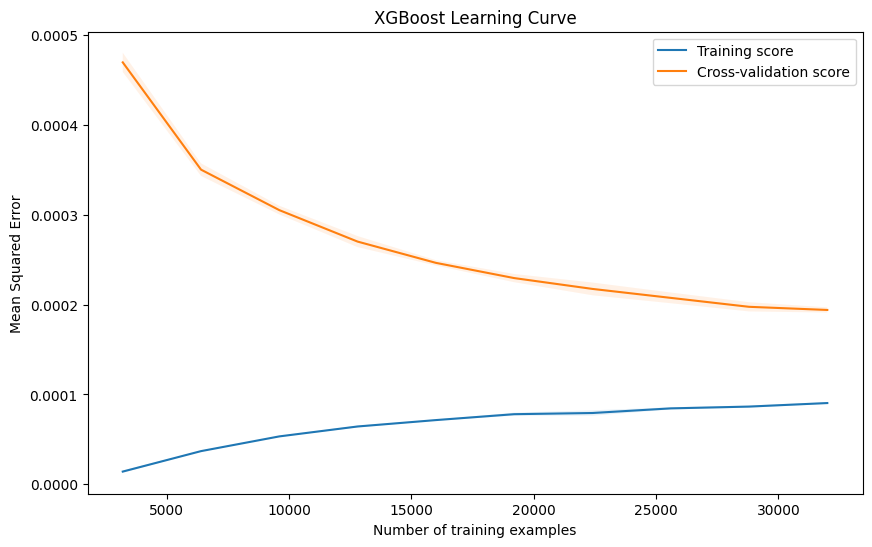

In [ ]:
# Learning curve for XGBoost
train_sizes, train_scores, test_scores = learning_curve(
    xgb_model, X_train, Y_train, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='neg_mean_squared_error'
)

train_scores = -train_scores
test_scores = -test_scores

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel('Number of training examples')
plt.ylabel('Mean Squared Error')
plt.title('XGBoost Learning Curve')
plt.legend()
plt.show()

# **XGBoost Regressor with Hyperparameter Tuning**

In [ ]:
# Define a reduced parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [0, 0.1, 1]
}

In [ ]:
# Instantiate the XGBoost regressor
xgb_best_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Instantiate GridSearchCV
xgb_grid_search = GridSearchCV(estimator=xgb_best_model, param_grid=param_grid,
                          scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV to find the best parameters
xgb_grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'reg_alpha': [0, 0.1, 1],
                         'reg_lambda': [0, 0.1, 1]},
             scoring='neg_mean_squared_error', verbose=2)

In [ ]:
# Get the best parameters and best score
xgb_best_params = xgb_grid_search.best_params_
xgb_best_score = -xgb_grid_search.best_score_

print(f"Best Parameters: {xgb_best_params}")
print(f"Best MSE: {xgb_best_score}")

# Train the final model with the best parameters
xgb_final_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, **xgb_best_params)
xgb_final_model.fit(X_train, Y_train)

Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'reg_alpha': 0, 'reg_lambda': 1}
Best MSE: 0.0001429032904010365


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Evaluate the tuned model
xgb_best_Y_pred = xgb_final_model.predict(X_test)

# Metrics for the tuned model
xgb_best_test_mse = mean_squared_error(Y_test, xgb_best_Y_pred)
xgb_best_test_mae = mean_absolute_error(Y_test, xgb_best_Y_pred)
xgb_best_test_r2 = r2_score(Y_test, xgb_best_Y_pred)

print(f'XGBoost Tuned Test MSE: {xgb_best_test_mse}')
print(f'XGBoost Tuned Test MAE: {xgb_best_test_mae}')
print(f'XGBoost Tuned Test R²: {xgb_best_test_r2}')

XGBoost Tuned Test MSE: 0.0001409547311681474
XGBoost Tuned Test MAE: 0.00937291620564461
XGBoost Tuned Test R²: 0.9434049875528814


In [ ]:
# Comparing predicted vs actual values
comparison = pd.DataFrame({'Actual Flood Probability (%)': Y_test, 'Predicted Flood Probability (%)': xgb_best_Y_pred})
print(comparison.head())

       Actual Flood Probability (%)  Predicted Flood Probability (%)
33553                         0.455                         0.465619
9427                          0.495                         0.512128
199                           0.470                         0.473040
12447                         0.460                         0.462786
39489                         0.465                         0.463155


In [ ]:
predictions = xgb_final_model.predict(X)

# Display predictions
production_data['PredictedFloodProbability(%)'] = predictions
print(production_data[['PredictedFloodProbability(%)']].head())

   PredictedFloodProbability(%)
0                      0.456307
1                      0.473404
2                      0.523569
3                      0.518715
4                      0.463399


In [ ]:
# Feature importances for XGBoost
xgb_best_feature_names = list(X.columns)
xgb_best_importances = xgb_final_model.feature_importances_

xgb_best_importance_series = pd.Series(xgb_best_importances, index=xgb_best_feature_names)
fig_xgb_best = px.bar(xgb_best_importance_series.sort_values(ascending=False),
                title="XGBoost with Hyperparameter Tuning Feature Importances",
                labels={'index': 'Features', 'value': 'Importance'},
                text=xgb_best_importance_series.sort_values(ascending=False).values)
fig_xgb_best.update_traces(texttemplate='%{text:.3f}', textposition='outside')
fig_xgb_best.show()

xgb_best_importance_series = xgb_best_importance_series.sort_values(ascending=False)

# Print the feature importance type and value
for feature_name, importance_value in xgb_best_importance_series.items():
    print(f"{feature_name}: {importance_value:.5f}")

AgriculturalPractices: 0.05876
DamsQuality: 0.05502
InadequatePlanning: 0.05471
TopographyDrainage: 0.05337
PoliticalFactors: 0.05312
Siltation: 0.05197
Watersheds: 0.05112
PopulationScore: 0.05057
WetlandLoss: 0.05021
Landslides: 0.04949
IneffectiveDisasterPreparedness: 0.04933
RiverManagement: 0.04851
Deforestation: 0.04849
DeterioratingInfrastructure: 0.04849
MonsoonIntensity: 0.04792
ClimateChange: 0.04770
CoastalVulnerability: 0.04738
DrainageSystems: 0.04522
Urbanization: 0.04480
Encroachments: 0.04383


In [ ]:
# Interactive plot for Actual vs. Predicted Values
fig = px.scatter(x=Y_test, y= xgb_best_Y_pred, labels={'x': 'Actual Flood Probability (%)', 'y': 'Predicted Flood Probability (%)'},
                 title='XGBoost Tuned: Actual vs. Predicted Flood Probability')
fig.add_shape(type='line', line=dict(dash='dash', color='red'),
              x0=Y_test.min(), y0=Y_test.min(), x1=Y_test.max(), y1=Y_test.max())
fig.show()

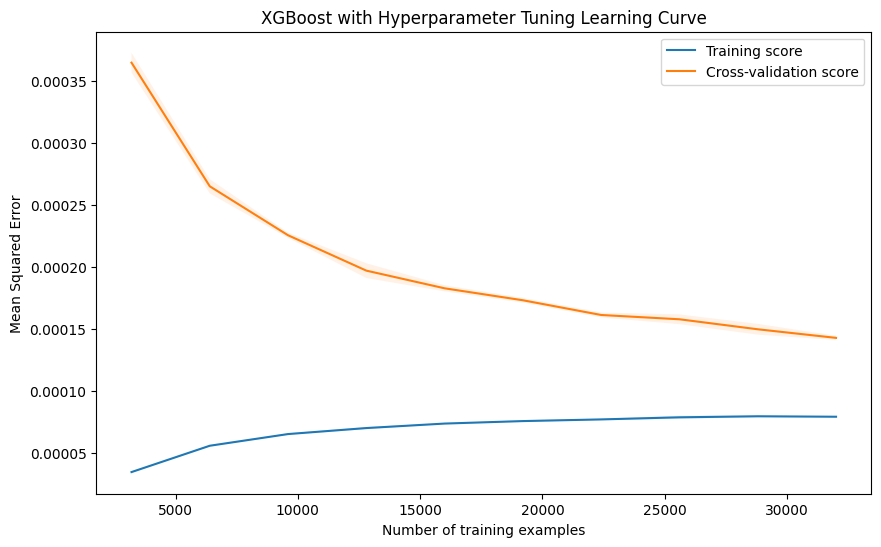

In [ ]:
# Learning curve for XGBoost with Hyperparameter Tuning
train_sizes, train_scores, test_scores = learning_curve(
    xgb_final_model, X_train, Y_train, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='neg_mean_squared_error'
)

train_scores = -train_scores
test_scores = -test_scores

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel('Number of training examples')
plt.ylabel('Mean Squared Error')
plt.title('XGBoost with Hyperparameter Tuning Learning Curve')
plt.legend()
plt.show()

# **Random Forest with Cross-Validation**

In [ ]:
# Separate features and target
X = production_data.drop('FloodProbability', axis=1)
y = production_data['FloodProbability']

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training Data Shape: X_train: {X_train.shape}, Y_train: {Y_train.shape}")
print(f"Testing Data Shape: X_test: {X_test.shape}, Y_test: {Y_test.shape}")

# Instantiate Random Forest model
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)

Training Data Shape: X_train: (40000, 20), Y_train: (40000,)
Testing Data Shape: X_test: (10000, 20), Y_test: (10000,)


In [ ]:
# Cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
rf_cv_scores = cross_val_score(rf_model, X_train, Y_train, cv=kf, scoring='neg_mean_squared_error')
rf_cv_mse = -rf_cv_scores
print(f'Random Forest 10-Fold CV MSE: Mean = {rf_cv_mse.mean()}, Std = {rf_cv_mse.std()}')

Random Forest 10-Fold CV MSE: Mean = 0.0006752378489375006, Std = 1.107352315809023e-05


In [ ]:
# Train the model and evaluate on the test set
rf_model.fit(X_train, Y_train)
rf_Y_pred = rf_model.predict(X_test)

In [ ]:
# Evaluation metrics
rf_test_mse = mean_squared_error(Y_test, rf_Y_pred)
rf_test_mae = mean_absolute_error(Y_test, rf_Y_pred)
rf_test_r2 = r2_score(Y_test, rf_Y_pred)

print(f'Random Forest Test MSE: {rf_test_mse}')
print(f'Random Forest Test MAE: {rf_test_mae}')
print(f'Random Forest Test R²: {rf_test_r2}')

Random Forest Test MSE: 0.0006737141275000004
Random Forest Test MAE: 0.02049824000000001
Random Forest Test R²: 0.7294957103200914


In [ ]:
# Comparing predicted vs actual values
rf_comparison = pd.DataFrame({'Actual Flood Probability (%)': Y_test, 'Predicted Flood Probability (%)': rf_Y_pred})
print(rf_comparison.head())

       Actual Flood Probability (%)  Predicted Flood Probability (%)
33553                         0.455                          0.46375
9427                          0.495                          0.50075
199                           0.470                          0.48495
12447                         0.460                          0.46685
39489                         0.465                          0.48315


In [ ]:
# Feature importances for Random Forest
rf_feature_names = list(X.columns)
rf_importances = rf_model.feature_importances_

# Plot feature importances using Plotly
rf_importance_series = pd.Series(rf_importances, index=rf_feature_names)
fig_rf = px.bar(rf_importance_series.sort_values(ascending=False),
                title="Random Forest Feature Importances",
                labels={'index': 'Features', 'value': 'Importance'},
                text=rf_importance_series.sort_values(ascending=False).values)
fig_rf.update_traces(texttemplate='%{text:.3f}', textposition='outside')
fig_rf.show()

# Sort the series by importance in descending order
rf_importance_series = rf_importance_series.sort_values(ascending=False)

# Print the feature importance type and value
for feature_name, importance_value in rf_importance_series.items():
    print(f"{feature_name}: {importance_value:.5f}")

TopographyDrainage: 0.05302
DamsQuality: 0.05279
PoliticalFactors: 0.05238
IneffectiveDisasterPreparedness: 0.05164
PopulationScore: 0.05162
RiverManagement: 0.05140
Landslides: 0.05100
AgriculturalPractices: 0.05067
DeterioratingInfrastructure: 0.05064
Watersheds: 0.05055
Siltation: 0.05033
Deforestation: 0.04962
WetlandLoss: 0.04929
Urbanization: 0.04906
MonsoonIntensity: 0.04847
DrainageSystems: 0.04818
ClimateChange: 0.04816
InadequatePlanning: 0.04760
CoastalVulnerability: 0.04685
Encroachments: 0.04674


In [ ]:
 # Interactive plot for Actual vs. Predicted Values (Random Forest)
fig_rf_actual_pred = px.scatter(x=Y_test, y=rf_Y_pred,
                                 labels={'x': 'Actual Flood Probability (%)', 'y': 'Predicted Flood Probability (%)'},
                                 title='Random Forest: Actual vs. Predicted Flood Probability')
fig_rf_actual_pred.add_shape(type='line', line=dict(dash='dash', color='red'),
                             x0=Y_test.min(), y0=Y_test.min(), x1=Y_test.max(), y1=Y_test.max())
fig_rf_actual_pred.show()

In [ ]:
# Learning curve for Random Forest
rf_train_sizes, rf_train_scores, rf_test_scores = learning_curve(
    rf_model, X_train, Y_train, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='neg_mean_squared_error'
)

rf_train_scores = -rf_train_scores
rf_test_scores = -rf_test_scores

rf_train_mean = np.mean(rf_train_scores, axis=1)
rf_train_std = np.std(rf_train_scores, axis=1)
rf_test_mean = np.mean(rf_test_scores, axis=1)
rf_test_std = np.std(rf_test_scores, axis=1)


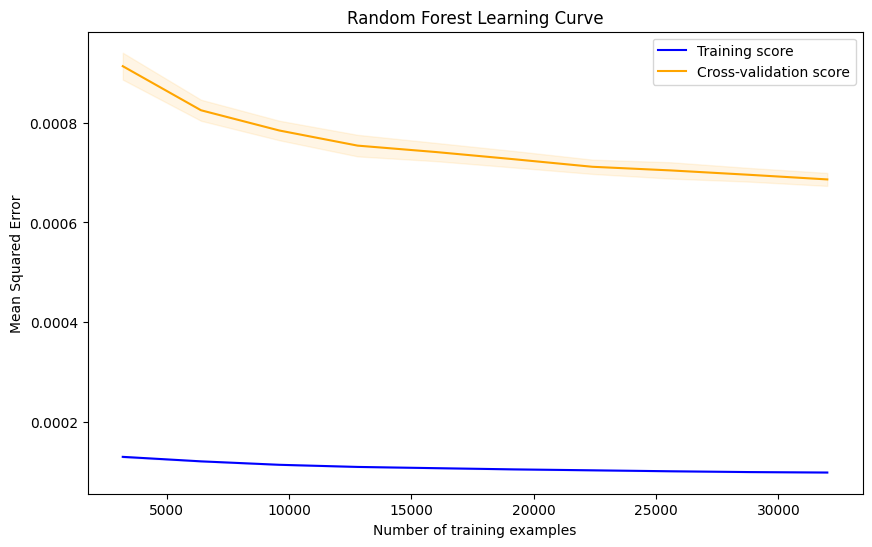

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(rf_train_sizes, rf_train_mean, label='Training score', color='blue')
plt.plot(rf_train_sizes, rf_test_mean, label='Cross-validation score', color='orange')
plt.fill_between(rf_train_sizes, rf_train_mean - rf_train_std, rf_train_mean + rf_train_std, alpha=0.1, color='blue')
plt.fill_between(rf_train_sizes, rf_test_mean - rf_test_std, rf_test_mean + rf_test_std, alpha=0.1, color='orange')
plt.xlabel('Number of training examples')
plt.ylabel('Mean Squared Error')
plt.title('Random Forest Learning Curve')
plt.legend()
plt.show()

# **Random Forest with Hyperparameter Tuning**

In [ ]:
# Define a reduced parameter grid
param_grid = {
    'max_depth': [None, 10],
    'criterion': ['squared_error', 'friedman_mse']
}

# Instantiate the Random Forest regressor
rf_best_model = RandomForestRegressor(random_state=42)

In [ ]:
# Instantiate the GridSearchCV object
rf_grid_search = GridSearchCV(estimator=rf_best_model,
                              param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, n_jobs=-1, verbose=2)


In [ ]:
# Fit GridSearchCV to find the best parameters
rf_grid_search.fit(X_train, Y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [None, 10]},
             scoring='neg_mean_squared_error', verbose=2)

In [ ]:
# Get the best parameters and best score
best_params = rf_grid_search.best_params_
best_score = -rf_grid_search.best_score_

print(f"Best Parameters from GridSearchCV: {best_params}")
print(f"Best MSE from GridSearchCV: {best_score}")

Best Parameters from GridSearchCV: {'criterion': 'squared_error', 'max_depth': None}
Best MSE from GridSearchCV: 0.0007007257915154526


In [ ]:
# Train Random Forest with best parameters
rf_final_model = RandomForestRegressor(**best_params, random_state=42)
rf_final_model.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Evaluate the tuned model
rf_best_Y_pred = rf_final_model.predict(X_test)

In [ ]:
# Metrics for the tuned model
rf_best_test_mse = mean_squared_error(Y_test, rf_best_Y_pred)
rf_best_test_mae = mean_absolute_error(Y_test, rf_best_Y_pred)
rf_best_test_r2 = r2_score(Y_test, rf_best_Y_pred)

print(f'Random Forest Tuned Test MSE: {rf_best_test_mse}')
print(f'Random Forest Tuned Test MAE: {rf_best_test_mae}')
print(f'Random Forest Tuned Test R²: {rf_best_test_r2}')

Random Forest Tuned Test MSE: 0.0006737141275000004
Random Forest Tuned Test MAE: 0.02049824000000001
Random Forest Tuned Test R²: 0.7294957103200914


In [ ]:
# Feature importances for Random Forest
rf_best_feature_names = list(X.columns)
rf_best_importances = rf_final_model.feature_importances_

rf_best_importance_series = pd.Series(rf_best_importances, index=rf_best_feature_names)
fig_rf_best = px.bar(rf_best_importance_series.sort_values(ascending=False),
                title="Random Forest with Hyperparameter Tuning Feature Importances",
                labels={'index': 'Features', 'value': 'Importance'},
                text=rf_best_importance_series.sort_values(ascending=False).values)
fig_rf_best.update_traces(texttemplate='%{text:.3f}', textposition='outside')
fig_rf_best.show()

rf_best_importance_series = rf_best_importance_series.sort_values(ascending=False)

# Print the feature importance type and value
for feature_name, importance_value in rf_best_importance_series.items():
    print(f"{feature_name}: {importance_value:.5f}")

TopographyDrainage: 0.05302
DamsQuality: 0.05279
PoliticalFactors: 0.05238
IneffectiveDisasterPreparedness: 0.05164
PopulationScore: 0.05162
RiverManagement: 0.05140
Landslides: 0.05100
AgriculturalPractices: 0.05067
DeterioratingInfrastructure: 0.05064
Watersheds: 0.05055
Siltation: 0.05033
Deforestation: 0.04962
WetlandLoss: 0.04929
Urbanization: 0.04906
MonsoonIntensity: 0.04847
DrainageSystems: 0.04818
ClimateChange: 0.04816
InadequatePlanning: 0.04760
CoastalVulnerability: 0.04685
Encroachments: 0.04674


In [ ]:
# Interactive plot for Actual vs. Predicted Values (Tuned Random Forest)
fig_rf_best_actual_pred = px.scatter(x=Y_test, y=rf_best_Y_pred,
                                     labels={'x': 'Actual Flood Probability (%)', 'y': 'Predicted Flood Probability (%)'},
                                     title='Random Forest (Tuned): Actual vs. Predicted Flood Probability')
fig_rf_best_actual_pred.add_shape(type='line', line=dict(dash='dash', color='red'),
                                  x0=Y_test.min(), y0=Y_test.min(), x1=Y_test.max(), y1=Y_test.max())
fig_rf_best_actual_pred.show()

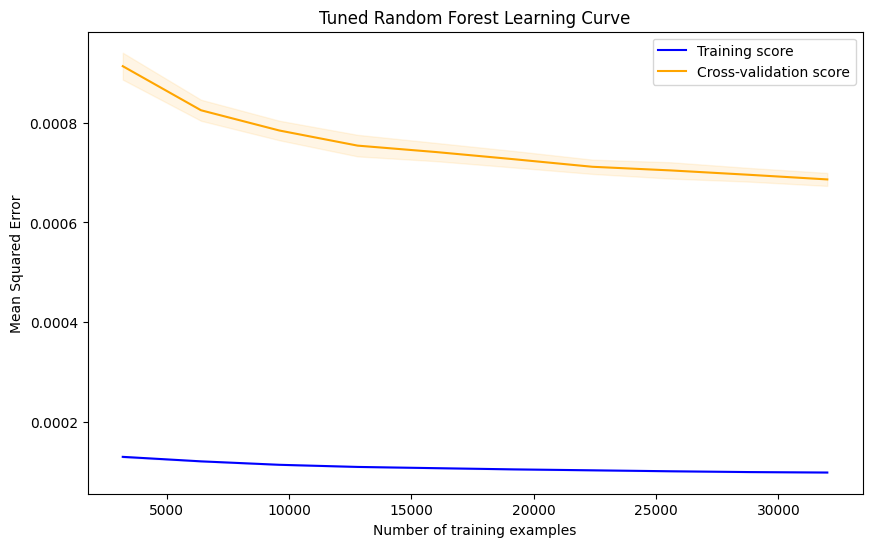

In [ ]:
# Learning curve for Random Forest with hyperparameter tuning
rf_train_sizes, rf_train_scores, rf_test_scores = learning_curve(
    rf_final_model, X_train, Y_train, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='neg_mean_squared_error'
)

rf_train_scores = -rf_train_scores
rf_test_scores = -rf_test_scores

rf_train_mean = np.mean(rf_train_scores, axis=1)
rf_train_std = np.std(rf_train_scores, axis=1)
rf_test_mean = np.mean(rf_test_scores, axis=1)
rf_test_std = np.std(rf_test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(rf_train_sizes, rf_train_mean, label='Training score', color='blue')
plt.plot(rf_train_sizes, rf_test_mean, label='Cross-validation score', color='orange')
plt.fill_between(rf_train_sizes, rf_train_mean - rf_train_std, rf_train_mean + rf_train_std, alpha=0.1, color='blue')
plt.fill_between(rf_train_sizes, rf_test_mean - rf_test_std, rf_test_mean + rf_test_std, alpha=0.1, color='orange')
plt.xlabel('Number of training examples')
plt.ylabel('Mean Squared Error')
plt.title('Tuned Random Forest Learning Curve')
plt.legend()
plt.show()

# **Decision Trees with Cross-Validation**

In [ ]:
# Separate features and target
X = production_data.drop('FloodProbability', axis=1)
y = production_data['FloodProbability']

In [ ]:
# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training Data Shape: X_train: {X_train.shape}, Y_train: {Y_train.shape}")
print(f"Testing Data Shape: X_test: {X_test.shape}, Y_test: {Y_test.shape}")

Training Data Shape: X_train: (40000, 20), Y_train: (40000,)
Testing Data Shape: X_test: (10000, 20), Y_test: (10000,)


In [ ]:
# Instantiate Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)

In [ ]:
# Cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
dt_cv_scores = cross_val_score(dt_model, X_train, Y_train, cv=kf, scoring='neg_mean_squared_error')
dt_cv_mse = -dt_cv_scores
print(f'Decision Tree 10-Fold CV MSE: Mean = {dt_cv_mse.mean()}, Std = {dt_cv_mse.std()}')

Decision Tree 10-Fold CV MSE: Mean = 0.0021784468750000005, Std = 5.43440230190094e-05


In [ ]:
# Train the model and evaluate on the test set
dt_model.fit(X_train, Y_train)
dt_Y_pred = dt_model.predict(X_test)

In [ ]:
# Evaluation metrics
dt_test_mse = mean_squared_error(Y_test, dt_Y_pred)
dt_test_mae = mean_absolute_error(Y_test, dt_Y_pred)
dt_test_r2 = r2_score(Y_test, dt_Y_pred)

print(f'Decision Tree Test MSE: {dt_test_mse}')
print(f'Decision Tree Test MAE: {dt_test_mae}')
print(f'Decision Tree Test R²: {dt_test_r2}')

Decision Tree Test MSE: 0.0022107775
Decision Tree Test MAE: 0.037311500000000004
Decision Tree Test R²: 0.11234636047048963


In [ ]:
# Comparing predicted vs actual values
comparison = pd.DataFrame({'Actual Flood Probability (%)': Y_test, 'Predicted Flood Probability (%)': dt_Y_pred})
print(comparison.head())

       Actual Flood Probability (%)  Predicted Flood Probability (%)
33553                         0.455                            0.475
9427                          0.495                            0.435
199                           0.470                            0.535
12447                         0.460                            0.445
39489                         0.465                            0.385


In [ ]:
# Feature Importances for Decision Tree
dt_importances = dt_model.feature_importances_
dt_feature_names = list(X.columns)

dt_importance_series = pd.Series(dt_importances, index=dt_feature_names)
fig_dt = px.bar(dt_importance_series.sort_values(ascending=False),
                title="Decision Tree Feature Importances",
                labels={'index': 'Features', 'value': 'Importance'},
                text=dt_importance_series.sort_values(ascending=False).values.round(3))
fig_dt.update_traces(texttemplate='%{text}', textposition='outside')
fig_dt.show()

dt_importance_series = dt_importance_series.sort_values(ascending=False)

# Print the feature importance type and value
for feature_name, importance_value in dt_importance_series.items():
    print(f"{feature_name}: {importance_value:.5f}")

PoliticalFactors: 0.05500
IneffectiveDisasterPreparedness: 0.05438
Landslides: 0.05263
TopographyDrainage: 0.05245
PopulationScore: 0.05219
RiverManagement: 0.05218
Deforestation: 0.05135
Siltation: 0.05068
DamsQuality: 0.04996
AgriculturalPractices: 0.04987
WetlandLoss: 0.04969
ClimateChange: 0.04945
Watersheds: 0.04935
DrainageSystems: 0.04849
DeterioratingInfrastructure: 0.04843
MonsoonIntensity: 0.04826
InadequatePlanning: 0.04762
Urbanization: 0.04685
CoastalVulnerability: 0.04633
Encroachments: 0.04484


In [ ]:
# Interactive plot for Actual vs. Predicted Values
fig = px.scatter(x=Y_test, y=dt_Y_pred, labels={'x': 'Actual Flood Probability (%)', 'y': 'Predicted Flood Probability (%)'},
                 title='Decision Tree: Actual vs. Predicted Flood Probability')
fig.add_shape(type='line', line=dict(dash='dash', color='red'),
              x0=Y_test.min(), y0=Y_test.min(), x1=Y_test.max(), y1=Y_test.max())
fig.show()

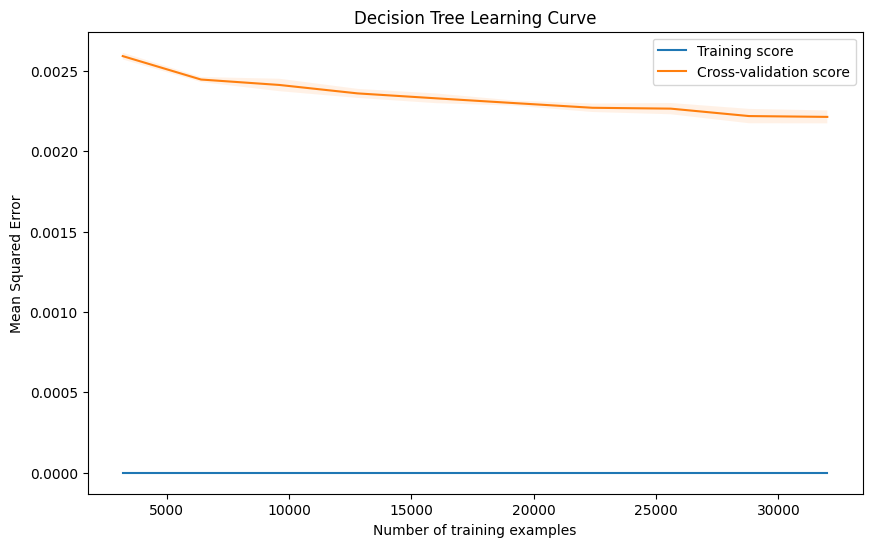

In [ ]:
# Learning Curve for Decision Tree
train_sizes, train_scores, test_scores = learning_curve(
    dt_model, X_train, Y_train, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='neg_mean_squared_error'
)

train_scores = -train_scores
test_scores = -test_scores

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel('Number of training examples')
plt.ylabel('Mean Squared Error')
plt.title('Decision Tree Learning Curve')
plt.legend()
plt.show()

#**Decision Trees with Hyperparameter Tuning**

In [ ]:
# Hyperparameter Tuning with GridSearchCV for Decision Tree
param_grid = {
    'max_depth': [None, 5, 10, 15],
}

# Instantiate the Decision Tree regressor
dt_best_model = DecisionTreeRegressor(random_state=42)

In [ ]:
# Instantiate the GridSearchCV object
dt_grid_search = GridSearchCV(estimator=dt_best_model,
                              param_grid=param_grid,
                              cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

In [ ]:
# Fit GridSearchCV to find the best parameters
dt_grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 15]},
             scoring='neg_mean_squared_error', verbose=2)

In [ ]:
# Get the best parameters and best score
best_params = dt_grid_search.best_params_
best_score = -dt_grid_search.best_score_

print(f"Best Parameters from GridSearchCV: {best_params}")
print(f"Best MSE from GridSearchCV: {best_score}")

Best Parameters from GridSearchCV: {'max_depth': 10}
Best MSE from GridSearchCV: 0.0018963889869996861


In [ ]:
# Train Decision Tree with best parameters
dt_final_model = DecisionTreeRegressor(**best_params, random_state=42)
dt_final_model.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=10, random_state=42)

In [ ]:
# Evaluate the tuned model
dt_best_Y_pred = dt_final_model.predict(X_test)

In [ ]:
# Metrics for the tuned model
dt_best_test_mse = mean_squared_error(Y_test, dt_best_Y_pred)
dt_best_test_mae = mean_absolute_error(Y_test, dt_best_Y_pred)
dt_best_test_r2 = r2_score(Y_test, dt_best_Y_pred)

print(f'Decision Tree Tuned Test MSE: {dt_best_test_mse}')
print(f'Decision Tree Tuned Test MAE: {dt_best_test_mae}')
print(f'Decision Tree Tuned Test R²: {dt_best_test_r2}')

Decision Tree Tuned Test MSE: 0.001930418542723685
Decision Tree Tuned Test MAE: 0.035031305987378636
Decision Tree Tuned Test R²: 0.22491383901639472


In [ ]:
# Feature Importances for the tuned model
dt_best_importances = dt_final_model.feature_importances_
dt_best_importance_series = pd.Series(dt_best_importances, index=X.columns)

fig_dt_best = px.bar(dt_best_importance_series.sort_values(ascending=False),
                     title="Decision Tree Tuned Feature Importances",
                     labels={'index': 'Features', 'value': 'Importance'},
                     text=dt_best_importance_series.sort_values(ascending=False).values.round(3))
fig_dt_best.update_traces(texttemplate='%{text}', textposition='outside')
fig_dt_best.show()

dt_best_importance_series = dt_best_importance_series.sort_values(ascending=False)

# Print the feature importance type and value
for feature_name, importance_value in dt_best_importance_series.items():
    print(f"{feature_name}: {importance_value:.5f}")

PoliticalFactors: 0.07549
Deforestation: 0.06527
IneffectiveDisasterPreparedness: 0.06116
PopulationScore: 0.05920
RiverManagement: 0.05826
Landslides: 0.05713
DamsQuality: 0.05669
TopographyDrainage: 0.05152
Watersheds: 0.04994
Siltation: 0.04973
ClimateChange: 0.04729
MonsoonIntensity: 0.04689
AgriculturalPractices: 0.04491
WetlandLoss: 0.04443
DeterioratingInfrastructure: 0.04346
DrainageSystems: 0.04145
InadequatePlanning: 0.04137
Urbanization: 0.03969
CoastalVulnerability: 0.03362
Encroachments: 0.03252


In [ ]:
# Interactive plot for Actual vs. Predicted Values (Tuned Decision Tree)
fig_dt_best_actual_pred = px.scatter(x=Y_test, y=dt_best_Y_pred,
                                     labels={'x': 'Actual Flood Probability (%)', 'y': 'Predicted Flood Probability (%)'},
                                     title='Decision Tree (Tuned): Actual vs. Predicted Flood Probability')
fig_dt_best_actual_pred.add_shape(type='line', line=dict(dash='dash', color='red'),
                                  x0=Y_test.min(), y0=Y_test.min(), x1=Y_test.max(), y1=Y_test.max())
fig_dt_best_actual_pred.show()

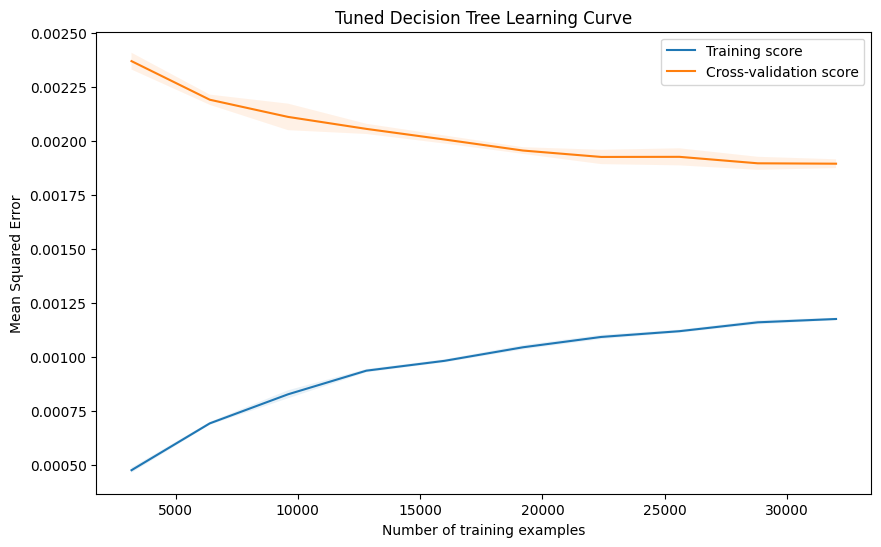

In [ ]:
# Learning curve for Decision Tree with Hyperparameter Tuning
train_sizes, train_scores, test_scores = learning_curve(
    dt_final_model, X_train, Y_train, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='neg_mean_squared_error'
)

train_scores = -train_scores
test_scores = -test_scores

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel('Number of training examples')
plt.ylabel('Mean Squared Error')
plt.title('Tuned Decision Tree Learning Curve')
plt.legend()
plt.show()

#**K Nearest Neighbors (KNN) Regression**

In [ ]:
# Separate features and target
X = production_data.drop('FloodProbability', axis=1)
y = production_data['FloodProbability']

In [ ]:
# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Data Shape: X_train: {X_train.shape}, Y_train: {Y_train.shape}")
print(f"Testing Data Shape: X_test: {X_test.shape}, Y_test: {Y_test.shape}")

Training Data Shape: X_train: (40000, 20), Y_train: (40000,)
Testing Data Shape: X_test: (10000, 20), Y_test: (10000,)


In [ ]:
# Instantiate KNN model
knn_model = KNeighborsRegressor(n_neighbors=5)

In [ ]:
# Cross-validation for KNN
kf = KFold(n_splits=10, shuffle=True, random_state=42)
knn_cv_scores = cross_val_score(knn_model, X_train, Y_train, cv=kf, scoring='neg_mean_squared_error')
knn_cv_mse = -knn_cv_scores
print(f'KNN 10-Fold CV MSE: Mean = {knn_cv_mse.mean()}, Std = {knn_cv_mse.std()}')

KNN 10-Fold CV MSE: Mean = 0.0005610511, Std = 1.7297304109744962e-05


In [ ]:
# Train and evaluate the model
knn_model.fit(X_train, Y_train)
knn_Y_pred = knn_model.predict(X_test)

knn_test_mse = mean_squared_error(Y_test, knn_Y_pred)
knn_test_mae = mean_absolute_error(Y_test, knn_Y_pred)
knn_test_r2 = r2_score(Y_test, knn_Y_pred)

print(f'KNN Test MSE: {knn_test_mse}')
print(f'KNN Test MAE: {knn_test_mae}')
print(f'KNN Test R²: {knn_test_r2}')

KNN Test MSE: 0.0005605644999999999
KNN Test MAE: 0.018565700000000004
KNN Test R²: 0.7749266406881561


In [ ]:
# Comparing predicted vs actual values
knn_comparison = pd.DataFrame({'Actual Flood Probability (%)': Y_test, 'Predicted Flood Probability (%)': knn_Y_pred})
print(knn_comparison.head())

       Actual Flood Probability (%)  Predicted Flood Probability (%)
33553                         0.455                            0.446
9427                          0.495                            0.497
199                           0.470                            0.476
12447                         0.460                            0.457
39489                         0.465                            0.478


In [ ]:
# Calculate permutation importance
perm_importance = permutation_importance(
    knn_model, X_test, Y_test, scoring='neg_mean_squared_error', n_repeats=5, random_state=42, n_jobs=-1
)

knn_feature_names = list(X.columns)
knn_importances = perm_importance.importances_mean

knn_importance_series = pd.Series(knn_importances, index=knn_feature_names)

fig_knn = px.bar(knn_importance_series.sort_values(ascending=False),
                title="K Nearest Neighbor Feature Importances",
                labels={'index': 'Features', 'value': 'Importance'},
                text=knn_importance_series.sort_values(ascending=False).values)

fig_knn.update_traces(texttemplate='%{text:.5f}', textposition='outside')
fig_knn.show()

In [ ]:
print(knn_importance_series.abs().sort_values(ascending=False))

MonsoonIntensity                   0.000165
WetlandLoss                        0.000163
CoastalVulnerability               0.000163
Watersheds                         0.000161
DamsQuality                        0.000160
DeterioratingInfrastructure        0.000160
ClimateChange                      0.000159
Deforestation                      0.000158
Siltation                          0.000157
RiverManagement                    0.000156
PoliticalFactors                   0.000156
TopographyDrainage                 0.000156
Urbanization                       0.000156
Encroachments                      0.000156
Landslides                         0.000155
AgriculturalPractices              0.000154
InadequatePlanning                 0.000154
PopulationScore                    0.000152
IneffectiveDisasterPreparedness    0.000151
DrainageSystems                    0.000146
dtype: float64


In [ ]:
# Interactive plot for Actual vs. Predicted Values (KNN)
fig_knn_actual_pred = px.scatter(x=Y_test, y=knn_Y_pred,
                                 labels={'x': 'Actual Flood Probability (%)', 'y': 'Predicted Flood Probability (%)'},
                                 title='KNN: Actual vs. Predicted Flood Probability')
fig_knn_actual_pred.add_shape(type='line', line=dict(dash='dash', color='red'),
                             x0=Y_test.min(), y0=Y_test.min(), x1=Y_test.max(), y1=Y_test.max())
fig_knn_actual_pred.show()

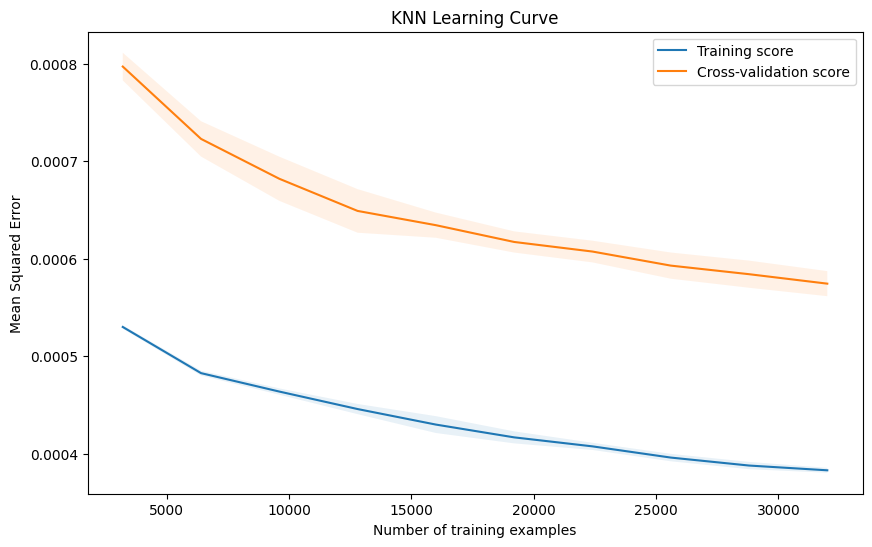

In [ ]:
# Learning curve for KNN
knn_train_sizes, knn_train_scores, knn_test_scores = learning_curve(
    knn_model, X_train, Y_train, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='neg_mean_squared_error'
)

knn_train_scores = -knn_train_scores
knn_test_scores = -knn_test_scores

knn_train_mean = np.mean(knn_train_scores, axis=1)
knn_train_std = np.std(knn_train_scores, axis=1)
knn_test_mean = np.mean(knn_test_scores, axis=1)
knn_test_std = np.std(knn_test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(knn_train_sizes, knn_train_mean, label='Training score')
plt.plot(knn_train_sizes, knn_test_mean, label='Cross-validation score')
plt.fill_between(knn_train_sizes, knn_train_mean - knn_train_std, knn_train_mean + knn_train_std, alpha=0.1)
plt.fill_between(knn_train_sizes, knn_test_mean - knn_test_std, knn_test_mean + knn_test_std, alpha=0.1)
plt.xlabel('Number of training examples')
plt.ylabel('Mean Squared Error')
plt.title('KNN Learning Curve')
plt.legend()
plt.show()

#**KNN Regression with Hyperparameter Tuning**

In [ ]:
# Hyperparameter Tuning with GridSearchCV for KNN
param_grid = {
    'n_neighbors': [7, 9, 11],
    'weights': ['uniform', 'distance'],
}

# Instantiate the KNN regressor
knn_best_model = KNeighborsRegressor()

In [ ]:
# Instantiate the GridSearchCV object
knn_grid_search = GridSearchCV(estimator=knn_best_model,
                              param_grid=param_grid,
                              cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

In [ ]:
# Fit GridSearchCV to find the best parameters
knn_grid_search.fit(X_train, Y_train)

# Get the best parameters and best score
best_params = knn_grid_search.best_params_
best_score = -knn_grid_search.best_score_

print(f"Best Parameters from GridSearchCV: {best_params}")
print(f"Best MSE from GridSearchCV: {best_score}")

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best Parameters from GridSearchCV: {'n_neighbors': 11, 'weights': 'distance'}
Best MSE from GridSearchCV: 0.0005410788059026862


In [ ]:
# Train KNN with best parameters
knn_final_model = KNeighborsRegressor(**best_params)
knn_final_model.fit(X_train, Y_train)

KNeighborsRegressor(n_neighbors=11, weights='distance')

In [ ]:
# Evaluate the tuned model
knn_best_Y_pred = knn_final_model.predict(X_test)

# Metrics for the tuned model
knn_best_test_mse = mean_squared_error(Y_test, knn_best_Y_pred)
knn_best_test_mae = mean_absolute_error(Y_test, knn_best_Y_pred)
knn_best_test_r2 = r2_score(Y_test, knn_best_Y_pred)

print(f'KNN Tuned Test MSE: {knn_best_test_mse}')
print(f'KNN Tuned Test MAE: {knn_best_test_mae}')
print(f'KNN Tuned Test R²: {knn_best_test_r2}')

KNN Tuned Test MSE: 0.0005139181395457094
KNN Tuned Test MAE: 0.01773762768644303
KNN Tuned Test R²: 0.7936557129842403


In [ ]:
# Calculate permutation importance
perm_importance = permutation_importance(
    knn_final_model, X_test, Y_test, scoring='neg_mean_squared_error', n_repeats=5, random_state=42
)

knn_best_feature_names = list(X.columns)
knn_best_importances = perm_importance.importances_mean

knn_best_importance_series = pd.Series(knn_best_importances, index=knn_best_feature_names)

fig_knn_best = px.bar(knn_best_importance_series.sort_values(ascending=False),
                title="K Nearest Neighbor with Hyperparameter Tuning Feature Importances",
                labels={'index': 'Features', 'value': 'Importance'},
                text=knn_best_importance_series.sort_values(ascending=False).values)  # No need to round here

fig_knn_best.update_traces(texttemplate='%{text:.5f}', textposition='outside')
fig_knn_best.show()

In [ ]:
# Interactive plot for Actual vs. Predicted Values (Tuned KNN)
fig_knn_best_actual_pred = px.scatter(x=Y_test, y=knn_best_Y_pred,
                                     labels={'x': 'Actual Flood Probability (%)', 'y': 'Predicted Flood Probability (%)'},
                                     title='KNN (Tuned): Actual vs. Predicted Flood Probability')
fig_knn_best_actual_pred.add_shape(type='line', line=dict(dash='dash', color='red'),
                                  x0=Y_test.min(), y0=Y_test.min(), x1=Y_test.max(), y1=Y_test.max())
fig_knn_best_actual_pred.show()

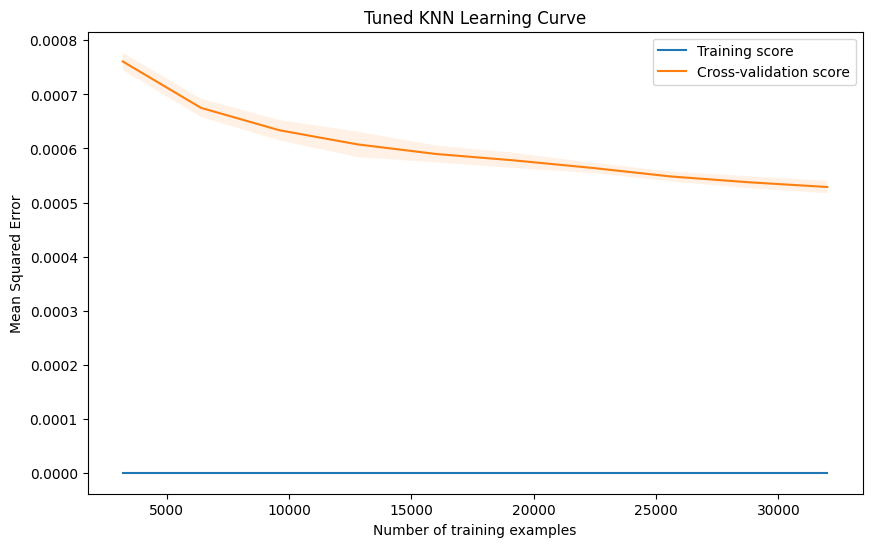

In [ ]:
# Learning curve for tuned KNN
knn_best_train_sizes, knn_best_train_scores, knn_best_test_scores = learning_curve(
    knn_final_model, X_train, Y_train, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='neg_mean_squared_error'
)

knn_best_train_scores = -knn_best_train_scores
knn_best_test_scores = -knn_best_test_scores

knn_best_train_mean = np.mean(knn_best_train_scores, axis=1)
knn_best_train_std = np.std(knn_best_train_scores, axis=1)
knn_best_test_mean = np.mean(knn_best_test_scores, axis=1)
knn_best_test_std = np.std(knn_best_test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(knn_best_train_sizes, knn_best_train_mean, label='Training score')
plt.plot(knn_best_train_sizes, knn_best_test_mean, label='Cross-validation score')
plt.fill_between(knn_best_train_sizes, knn_best_train_mean - knn_best_train_std, knn_best_train_mean + knn_best_train_std, alpha=0.1)
plt.fill_between(knn_best_train_sizes, knn_best_test_mean - knn_best_test_std, knn_best_test_mean + knn_best_test_std, alpha=0.1)
plt.xlabel('Number of training examples')
plt.ylabel('Mean Squared Error')
plt.title('Tuned KNN Learning Curve')
plt.legend()
plt.show()

# **Support Vector Regression**

In [ ]:
# Separate features and target
X = production_data.drop('FloodProbability', axis=1)
y = production_data['FloodProbability']

In [ ]:
# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Data Shape: X_train: {X_train.shape}, Y_train: {Y_train.shape}")
print(f"Testing Data Shape: X_test: {X_test.shape}, Y_test: {Y_test.shape}")


Training Data Shape: X_train: (40000, 20), Y_train: (40000,)
Testing Data Shape: X_test: (10000, 20), Y_test: (10000,)


In [ ]:
svr_model = SVR(kernel='rbf') # Using radial basis function kernel

In [ ]:
# Define 10-Fold Cross-Validation on training data
kf = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(svr_model, X_train, Y_train, cv=kf, scoring='neg_mean_squared_error')
cv_mse = -cv_scores

# Print mean and standard deviation of MSE from CV
print(f'SVR 10-Fold CV MSE: Mean = {cv_mse.mean()}, Std = {cv_mse.std()}')

SVR 10-Fold CV MSE: Mean = 0.0007274012711816151, Std = 2.8829867757274885e-05


In [ ]:
svr_model.fit(X_train, Y_train)
Y_pred_svr = svr_model.predict(X_test)

svr_mse = mean_squared_error(Y_test, Y_pred_svr)
svr_mae = mean_absolute_error(Y_test, Y_pred_svr)
svr_r2 = r2_score(Y_test, Y_pred_svr)

print(f'SVR Test MSE: {svr_mse}')
print(f'SVR Test MAE: {svr_mae}')
print(f'SVR Test R²: {svr_r2}')

SVR Test MSE: 0.0006971301967531037
SVR Test MAE: 0.020156666792254037
SVR Test R²: 0.7200938781158139


In [ ]:
# Comparing predicted vs actual values
comparison = pd.DataFrame({'Actual Flood Probability (%)': Y_test, 'Predicted Flood Probability (%)': Y_pred_svr})
print(comparison.head())

       Actual Flood Probability (%)  Predicted Flood Probability (%)
33553                         0.455                         0.454776
9427                          0.495                         0.509668
199                           0.470                         0.486198
12447                         0.460                         0.473202
39489                         0.465                         0.494310


In [ ]:
predictions = svr_model.predict(X)

# Display predictions
production_data['PredictedFloodProbability(%)'] = predictions
print(production_data[['PredictedFloodProbability(%)']].head())

   PredictedFloodProbability(%)
0                      0.480787
1                      0.505743
2                      0.520290
3                      0.523450
4                      0.479437


In [ ]:
result = permutation_importance(svr_model, X_test, Y_test, n_repeats=10, random_state=42)

# Get feature importances
importances = result.importances_mean

sorted_idx = importances.argsort()[::-1]
features = X_test.columns[sorted_idx]
importances = importances[sorted_idx]

fig_svr = px.bar(x=features, y=importances,
                title="Feature Importances for SVR (Permutation Importance)",
                labels={'x': 'Features', 'y': 'Importance'},
                text=importances.round(3))
fig_svr.update_traces(texttemplate='%{text:.3f}', textposition='outside')
fig_svr.show()

# Print feature importance type and value
for feature, importance in zip(features, importances):
    print(f"{feature}: {importance:.5f}")

RiverManagement: 0.06384
IneffectiveDisasterPreparedness: 0.05837
Siltation: 0.05794
PoliticalFactors: 0.05730
MonsoonIntensity: 0.05686
Deforestation: 0.05651
Watersheds: 0.05492
Urbanization: 0.05455
WetlandLoss: 0.05438
Landslides: 0.05423
TopographyDrainage: 0.05412
InadequatePlanning: 0.05365
Encroachments: 0.05294
DeterioratingInfrastructure: 0.05195
AgriculturalPractices: 0.05115
DamsQuality: 0.05110
ClimateChange: 0.04999
PopulationScore: 0.04997
DrainageSystems: 0.04430
CoastalVulnerability: 0.04363


In [ ]:
# Interactive plot for Actual vs. Predicted Values
fig = px.scatter(x=Y_test, y=Y_pred_svr, labels={'x': 'Actual Flood Probability (%)', 'y': 'Predicted Flood Probability (%)'},
                 title='SVR: Actual vs. Predicted Flood Probability')
fig.add_shape(type='line', line=dict(dash='dash', color='red'),
              x0=Y_test.min(), y0=Y_test.min(), x1=Y_test.max(), y1=Y_test.max())
fig.show()

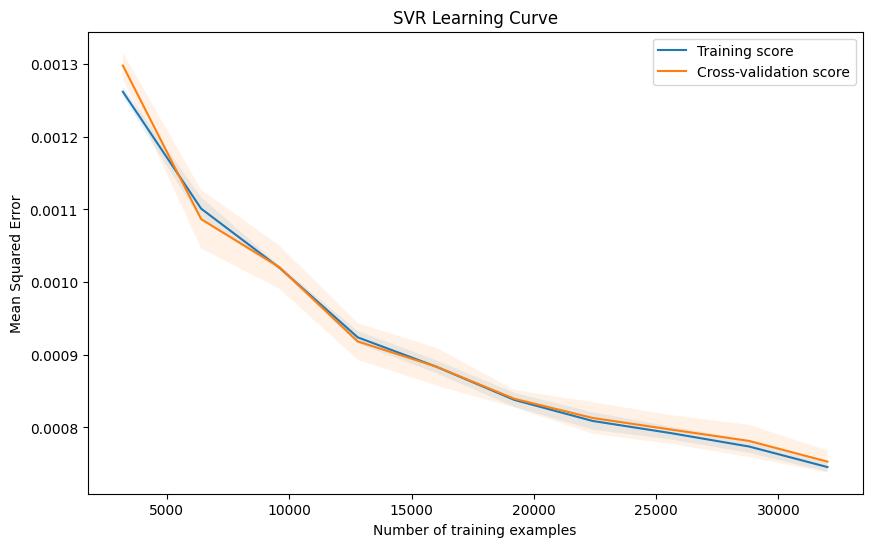

In [ ]:
# Learning curve for SVR
train_sizes, train_scores, test_scores = learning_curve(
    svr_model, X_train, Y_train, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='neg_mean_squared_error'
)

train_scores = -train_scores
test_scores = -test_scores

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel('Number of training examples')
plt.ylabel('Mean Squared Error')
plt.title('SVR Learning Curve')
plt.legend()
plt.show()

# **Support Vector Regression with Hyperparameter Tuning**

In [ ]:
param_grid = {
      'kernel': ['rbf', 'linear'],
      'C': [1, 10],
      'epsilon': [0.1, 0.5]
  }

svr_best_model = SVR()

In [ ]:
svr_grid_search = GridSearchCV(
    estimator=svr_model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error', cv=3, n_jobs=-1, verbose=2
)

svr_grid_search.fit(X_train, Y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [1, 10], 'epsilon': [0.1, 0.5],
                         'kernel': ['rbf', 'linear']},
             scoring='neg_mean_squared_error', verbose=2)

In [ ]:
best_params = svr_grid_search.best_params_
best_score = -svr_grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best MSE: {best_score}")

Best Parameters: {'C': 1, 'epsilon': 0.1, 'kernel': 'linear'}
Best MSE: 0.0007827276936672819


In [ ]:
svr_final_model = SVR(**best_params)
svr_final_model.fit(X_train, Y_train)

svr_best_Y_pred = svr_final_model.predict(X_test)

svr_best_test_mse = mean_squared_error(Y_test, svr_best_Y_pred)
svr_best_test_mae = mean_absolute_error(Y_test, svr_best_Y_pred)
svr_best_test_r2 = r2_score(Y_test, svr_best_Y_pred)

print(f'SVR Tuned Test MSE: {svr_best_test_mse}')
print(f'SVR Tuned Test MAE: {svr_best_test_mae}')
print(f'SVR Tuned Test R²: {svr_best_test_r2}')

SVR Tuned Test MSE: 0.0006589851359625163
SVR Tuned Test MAE: 0.02051742115334172
SVR Tuned Test R²: 0.7354095767968614


In [ ]:
# Comparing predicted vs actual values
comparison = pd.DataFrame({'Actual Flood Probability (%)': Y_test, 'Predicted Flood Probability (%)': svr_best_Y_pred})
print(comparison.head())

       Actual Flood Probability (%)  Predicted Flood Probability (%)
33553                         0.455                         0.485606
9427                          0.495                         0.498786
199                           0.470                         0.493144
12447                         0.460                         0.482486
39489                         0.465                         0.470623


In [ ]:
predictions = svr_final_model.predict(X)

# Display predictions
production_data['PredictedFloodProbability(%)'] = predictions
print(production_data[['PredictedFloodProbability(%)']].head())

   PredictedFloodProbability(%)
0                      0.474941
1                      0.502910
2                      0.506875
3                      0.512923
4                      0.494986


In [ ]:
result = permutation_importance(svr_final_model, X_test, Y_test, n_repeats=10, random_state=42)

importances = result.importances_mean

sorted_idx = importances.argsort()[::-1]
features = X_test.columns[sorted_idx]
importances = importances[sorted_idx]

fig_svr = px.bar(x=features, y=importances,
                title="Feature Importances for SVR (Permutation Importance)",
                labels={'x': 'Features', 'y': 'Importance'},
                text=importances.round(3))
fig_svr.update_traces(texttemplate='%{text:.3f}', textposition='outside')
fig_svr.show()

# Print feature importance type and value
for feature, importance in zip(features, importances):
    print(f"{feature}: {importance:.5f}")

IneffectiveDisasterPreparedness: 0.07090
Urbanization: 0.06420
ClimateChange: 0.06410
Deforestation: 0.05921
Watersheds: 0.05623
AgriculturalPractices: 0.05486
Landslides: 0.05442
Encroachments: 0.05330
WetlandLoss: 0.05235
InadequatePlanning: 0.05098
RiverManagement: 0.04997
DrainageSystems: 0.04748
DamsQuality: 0.04660
Siltation: 0.04582
PoliticalFactors: 0.04543
CoastalVulnerability: 0.04292
MonsoonIntensity: 0.03971
TopographyDrainage: 0.03711
PopulationScore: 0.03378
DeterioratingInfrastructure: 0.02944


In [ ]:
# Interactive plot for Actual vs. Predicted Values
fig = px.scatter(x=Y_test, y=svr_best_Y_pred, labels={'x': 'Actual Flood Probability (%)', 'y': 'Predicted Flood Probability (%)'},
                 title='SVR Tuned: Actual vs. Predicted Flood Probability')
fig.add_shape(type='line', line=dict(dash='dash', color='red'),
              x0=Y_test.min(), y0=Y_test.min(), x1=Y_test.max(), y1=Y_test.max())
fig.show()

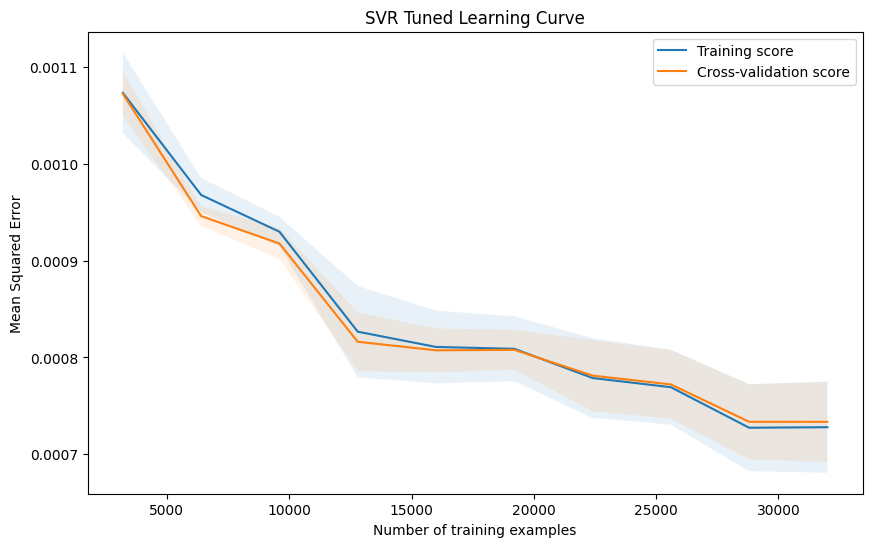

In [ ]:
# Learning curve for SVR with Hyperparameter Tuning
train_sizes, train_scores, test_scores = learning_curve(
    svr_final_model, X_train, Y_train, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='neg_mean_squared_error'
)

train_scores = -train_scores
test_scores = -test_scores

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel('Number of training examples')
plt.ylabel('Mean Squared Error')
plt.title('SVR Tuned Learning Curve')
plt.legend()
plt.show()

# **Artificial Neural Networks**

In [ ]:
X = production_data.drop('FloodProbability', axis=1)
y = production_data['FloodProbability']

In [ ]:
# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training Data Shape: X_train: {X_train.shape}, Y_train: {Y_train.shape}")
print(f"Testing Data Shape: X_test: {X_test.shape}, Y_test: {Y_test.shape}")

Training Data Shape: X_train: (40000, 20), Y_train: (40000,)
Testing Data Shape: X_test: (10000, 20), Y_test: (10000,)


In [ ]:
# Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Initialize ANN model
ann_model = MLPRegressor(hidden_layer_sizes=(64, 32),
                        activation='relu',
                        solver='adam',
                        max_iter=1000,
                        random_state=42)

In [ ]:
# Train
ann_model.fit(X_train, Y_train)

MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)

In [ ]:
# Predict
y_pred_ann = ann_model.predict(X_test)

In [ ]:
# Evaluate
ann_mse = mean_squared_error(Y_test, y_pred_ann)
ann_mae = mean_absolute_error(Y_test, y_pred_ann)
ann_r2 = r2_score(Y_test, y_pred_ann)

print(f'ANN Test MSE: {ann_mse}')
print(f'ANN Test MAE: {ann_mae}')
print(f'ANN Test R²: {ann_r2}')

ANN Test MSE: 3.95616705572194e-05
ANN Test MAE: 0.004809282392053923
ANN Test R²: 0.9841155155342484


In [ ]:
# Comparing Predicted vs. Actual Values
comparison = pd.DataFrame({
    'Actual Flood Probability': Y_test,
    'Predicted Flood Probability': y_pred_ann
})
print(comparison.head())

       Actual Flood Probability  Predicted Flood Probability
33553                     0.455                     0.460442
9427                      0.495                     0.483856
199                       0.470                     0.478432
12447                     0.460                     0.453979
39489                     0.465                     0.461978


In [ ]:
# Display Predictions
predictions = ann_model.predict(scaler.transform(X))
production_data['PredictedFloodProbability(%)'] = predictions
print(production_data[['PredictedFloodProbability(%)']].head())

   PredictedFloodProbability(%)
0                      0.448792
1                      0.466560
2                      0.521476
3                      0.519907
4                      0.470506


In [ ]:
# Calculate permutation importance
perm_importance = permutation_importance(
    ann_model, X_test, Y_test, scoring='neg_mean_squared_error', n_repeats=10, random_state=42
)

# Feature importances for ANN
ann_feature_names = list(X.columns)
ann_importances = perm_importance.importances_mean

ann_importance_series = pd.Series(ann_importances, index=ann_feature_names)

fig_ann = px.bar(ann_importance_series.sort_values(ascending=False),
                title="Artificial Neural Network Feature Importances",
                labels={'index': 'Features', 'value': 'Importance'},
                text=ann_importance_series.sort_values(ascending=False).values)  # No need to round here

fig_ann.update_traces(texttemplate='%{text:.5f}', textposition='outside')
fig_ann.show()

ann_importance_series = ann_importance_series.sort_values(ascending=False)

# Print the feature importance type and value
for feature_name, importance_value in ann_importance_series.items():
    print(f"{feature_name}: {importance_value:.6f}")

IneffectiveDisasterPreparedness: 0.000258
CoastalVulnerability: 0.000256
Deforestation: 0.000256
Encroachments: 0.000255
DamsQuality: 0.000255
Landslides: 0.000254
MonsoonIntensity: 0.000252
Urbanization: 0.000251
InadequatePlanning: 0.000251
RiverManagement: 0.000251
PopulationScore: 0.000251
Siltation: 0.000249
AgriculturalPractices: 0.000248
WetlandLoss: 0.000248
ClimateChange: 0.000246
DrainageSystems: 0.000245
PoliticalFactors: 0.000245
DeterioratingInfrastructure: 0.000242
Watersheds: 0.000241
TopographyDrainage: 0.000240


In [ ]:
# Interactive Plot for Actual vs. Predicted Values
fig = px.scatter(
    x=Y_test, y=y_pred_ann,
    labels={'x': 'Actual Flood Probability', 'y': 'Predicted Flood Probability'},
    title='Actual vs. Predicted Flood Probability (ANN)'
)
fig.add_shape(
    type='line',
    line=dict(dash='dash', color='red'),
    x0=Y_test.min(), y0=Y_test.min(),
    x1=Y_test.max(), y1=Y_test.max()
)
fig.show()

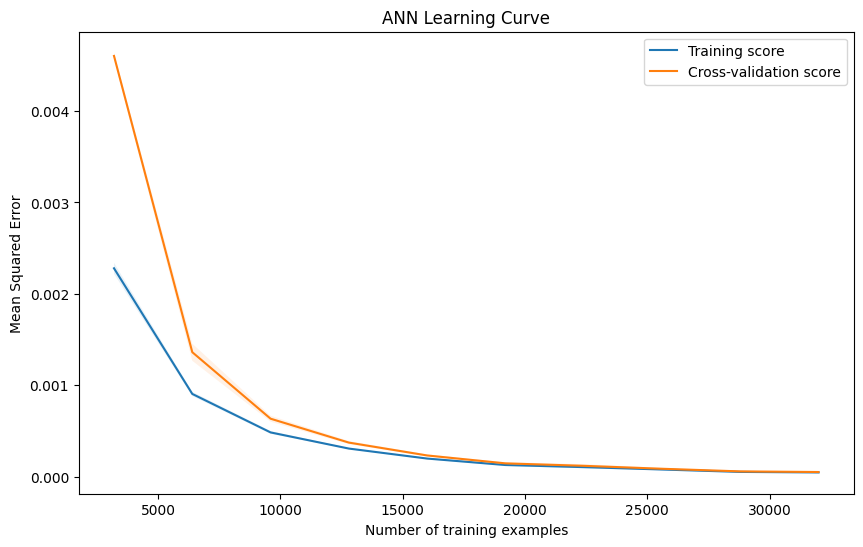

In [ ]:
# ANN Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    ann_model, X_train, Y_train, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='neg_mean_squared_error'
)

train_scores = -train_scores
test_scores = -test_scores

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel('Number of training examples')
plt.ylabel('Mean Squared Error')
plt.title('ANN Learning Curve')
plt.legend()
plt.show()

# **Artificial Neural Network with Hyperparameter Tuning**

In [ ]:
# Define a reduced parameter grid
param_grid = {
    'hidden_layer_sizes': [(100,), (50, 50)],
    'alpha': [0.001, 0.01],
    'learning_rate_init': [0.01, 0.1],
    'batch_size': [32, 64]
}

# Instantiate the ANN regressor
ann_best_model = MLPRegressor(random_state=42, max_iter=500)

In [ ]:
# Instantiate GridSearchCV
ann_grid_search = GridSearchCV(estimator=ann_best_model, param_grid=param_grid,
                          scoring='neg_mean_squared_error', cv=3, n_jobs=-1, verbose=2)

# Fit GridSearchCV to find the best parameters
ann_grid_search.fit(X_train, Y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3, estimator=MLPRegressor(max_iter=500, random_state=42),
             n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01], 'batch_size': [32, 64],
                         'hidden_layer_sizes': [(100,), (50, 50)],
                         'learning_rate_init': [0.01, 0.1]},
             scoring='neg_mean_squared_error', verbose=2)

In [ ]:
best_params = ann_grid_search.best_params_
best_score = -ann_grid_search.best_score_  # Negate if using a negative scoring metric

print(f"Best Parameters: {best_params}")
print(f"Best MSE: {best_score}")

ann_final_model = MLPRegressor(**best_params)
ann_final_model.fit(X_train, Y_train)

Best Parameters: {'alpha': 0.001, 'batch_size': 64, 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.01}
Best MSE: 6.359408170978901e-07


MLPRegressor(alpha=0.001, batch_size=64, learning_rate_init=0.01)

In [ ]:
ann_best_Y_pred = ann_final_model.predict(X_test)

# Metrics for the tuned model
ann_best_test_mse = mean_squared_error(Y_test, ann_best_Y_pred)
ann_best_test_mae = mean_absolute_error(Y_test, ann_best_Y_pred)
ann_best_test_r2 = r2_score(Y_test, ann_best_Y_pred)

print(f'ANN Tuned Test MSE: {ann_best_test_mse}')
print(f'ANN Tuned Test MAE: {ann_best_test_mae}')
print(f'ANN Tuned Test R²: {ann_best_test_r2}')

ANN Tuned Test MSE: 5.943492505182674e-06
ANN Tuned Test MAE: 0.002026352651337465
ANN Tuned Test R²: 0.9976136165879462


In [ ]:
# Comparing Predicted vs. Actual Values
comparison = pd.DataFrame({
    'Actual Flood Probability': Y_test,
    'Predicted Flood Probability': ann_best_Y_pred
})
print(comparison.head())

       Actual Flood Probability  Predicted Flood Probability
33553                     0.455                     0.453883
9427                      0.495                     0.492728
199                       0.470                     0.467037
12447                     0.460                     0.457760
39489                     0.465                     0.461829


In [ ]:
# Display Predictions
predictions = ann_final_model.predict(scaler.transform(X))
production_data['PredictedFloodProbability(%)'] = predictions
print(production_data[['PredictedFloodProbability(%)']].head())

   PredictedFloodProbability(%)
0                      0.447471
1                      0.473826
2                      0.510964
3                      0.519857
4                      0.472606


In [ ]:
# Calculate permutation importance
perm_importance = permutation_importance(
    ann_final_model, X_test, Y_test, scoring='neg_mean_squared_error', n_repeats=10, random_state=42
)

ann_feature_names = list(X.columns)
ann_importances = perm_importance.importances_mean

ann_importance_series = pd.Series(ann_importances, index=ann_feature_names)

fig_ann = px.bar(ann_importance_series.sort_values(ascending=False),
                title="Artificial Neural Network with Hyperparameter Tuning Feature Importances",
                labels={'index': 'Features', 'value': 'Importance'},
                text=ann_importance_series.sort_values(ascending=False).values)  # No need to round here

fig_ann.update_traces(texttemplate='%{text:.5f}', textposition='outside')
fig_ann.show()

ann_importance_series = ann_importance_series.sort_values(ascending=False)

# Print the feature importance type and value
for feature_name, importance_value in ann_importance_series.items():
    print(f"{feature_name}: {importance_value:.6f}")

IneffectiveDisasterPreparedness: 0.000264
MonsoonIntensity: 0.000263
Deforestation: 0.000261
DeterioratingInfrastructure: 0.000258
DamsQuality: 0.000258
Encroachments: 0.000254
TopographyDrainage: 0.000253
CoastalVulnerability: 0.000252
Watersheds: 0.000251
ClimateChange: 0.000250
WetlandLoss: 0.000250
Landslides: 0.000250
RiverManagement: 0.000249
Urbanization: 0.000246
PoliticalFactors: 0.000242
PopulationScore: 0.000242
Siltation: 0.000241
AgriculturalPractices: 0.000239
InadequatePlanning: 0.000238
DrainageSystems: 0.000236


In [ ]:
# Interactive Plot for Actual vs. Predicted Values
fig = px.scatter(
    x=Y_test, y=ann_best_Y_pred,
    labels={'x': 'Actual Flood Probability', 'y': 'Predicted Flood Probability'},
    title='ANN Tuned: Actual vs. Predicted Flood Probability'
)
fig.add_shape(
    type='line',
    line=dict(dash='dash', color='red'),
    x0=Y_test.min(), y0=Y_test.min(),
    x1=Y_test.max(), y1=Y_test.max()
)
fig.show()

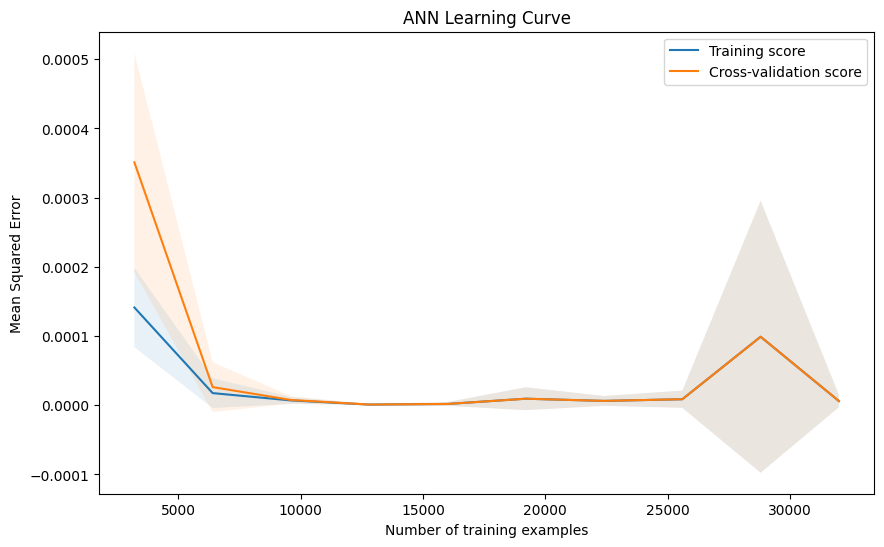

In [ ]:
# ANN Learning Curve with Hyperparameter Tuning
train_sizes, train_scores, test_scores = learning_curve(
    ann_final_model, X_train, Y_train, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='neg_mean_squared_error'
)

train_scores = -train_scores
test_scores = -test_scores

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel('Number of training examples')
plt.ylabel('Mean Squared Error')
plt.title('ANN Learning Curve')
plt.legend()
plt.show()

# **Artificial Neural Network with Hyperparameter Tuning using the Top 5 Best Features**

In [ ]:
X = production_data[['DamsQuality', 'IneffectiveDisasterPreparedness', 'Deforestation', 'PoliticalFactors', 'Watersheds']]
y = production_data['FloodProbability']

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Data Shape: X_train: {X_train.shape}, Y_train: {Y_train.shape}")
print(f"Testing Data Shape: X_test: {X_test.shape}, Y_test: {Y_test.shape}")

Training Data Shape: X_train: (40000, 5), Y_train: (40000,)
Testing Data Shape: X_test: (10000, 5), Y_test: (10000,)


In [ ]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Instantiate the ANN model with the best parameters from your previous tuning
best_params = {'alpha': 0.001, 'batch_size': 64,
               'hidden_layer_sizes': (100,), 'learning_rate_init': 0.01,
               'solver':'adam', 'activation': 'relu',
               'max_iter':500,}
ann_top5_model = MLPRegressor(**best_params)

# Train the model
ann_top5_model.fit(X_train, Y_train)

MLPRegressor(alpha=0.001, batch_size=64, learning_rate_init=0.01, max_iter=500)

In [ ]:
# Make predictions on the test set
top5_Y_pred = ann_top5_model.predict(X_test)

# Evaluate the model using appropriate metrics
top5_mse = mean_squared_error(Y_test, top5_Y_pred)
top5_mae = mean_absolute_error(Y_test, top5_Y_pred)
top5_r2 = r2_score(Y_test, top5_Y_pred)

print(f'ANN Using Top 5 Features Test MSE: {top5_mse}')
print(f'ANN Using Top 5 Features Test Test MAE: {top5_mae}')
print(f'ANN Using Top 5 Features Test Test R²: {top5_r2}')

ANN Using Top 5 Features Test MSE: 0.0019189264897592152
ANN Using Top 5 Features Test Test MAE: 0.034931617235230444
ANN Using Top 5 Features Test Test R²: 0.22952803589490345


In [ ]:
# Comparing Predicted vs. Actual Values
comparison = pd.DataFrame({
    'Actual Flood Probability': Y_test,
    'Predicted Flood Probability': top5_Y_pred
})
print(comparison.head())

       Actual Flood Probability  Predicted Flood Probability
33553                     0.455                     0.481739
9427                      0.495                     0.493007
199                       0.470                     0.511394
12447                     0.460                     0.490820
39489                     0.465                     0.482745


In [ ]:
# Display Predictions
predictions = ann_top5_model.predict(scaler.transform(X))
production_data['PredictedFloodProbability(%)'] = predictions
print(production_data[['PredictedFloodProbability(%)']].head())

   PredictedFloodProbability(%)
0                      0.504465
1                      0.469334
2                      0.491773
3                      0.539972
4                      0.490223


In [ ]:
# Calculate permutation importance
perm_importance = permutation_importance(
    ann_top5_model, X_test, Y_test, scoring='neg_mean_squared_error', n_repeats=10, random_state=42
)

ann_feature_names = list(X.columns)
ann_importances = perm_importance.importances_mean

ann_importance_series = pd.Series(ann_importances, index=ann_feature_names)

fig_ann = px.bar(ann_importance_series.sort_values(ascending=False),
                title="Artificial Neural Network with Hyperparameter Tuning using the Top 5 Best Features",
                labels={'index': 'Features', 'value': 'Importance'},
                text=ann_importance_series.sort_values(ascending=False).values)  # No need to round here

fig_ann.update_traces(texttemplate='%{text:.5f}', textposition='outside')
fig_ann.show()

ann_importance_series = ann_importance_series.sort_values(ascending=False)

# Print the feature importance type and value
for feature_name, importance_value in ann_importance_series.items():
    print(f"{feature_name}: {importance_value:.6f}")

DamsQuality: 0.000303
IneffectiveDisasterPreparedness: 0.000253
PoliticalFactors: 0.000247
Watersheds: 0.000215
Deforestation: 0.000197


In [ ]:
# Interactive Plot for Actual vs. Predicted Values
fig = px.scatter(
    x=Y_test, y=top5_Y_pred,
    labels={'x': 'Actual Flood Probability', 'y': 'Predicted Flood Probability'},
    title='ANN Tuned Top 5: Actual vs. Predicted Flood Probability'
)
fig.add_shape(
    type='line',
    line=dict(dash='dash', color='red'),
    x0=Y_test.min(), y0=Y_test.min(),
    x1=Y_test.max(), y1=Y_test.max()
)
fig.show()

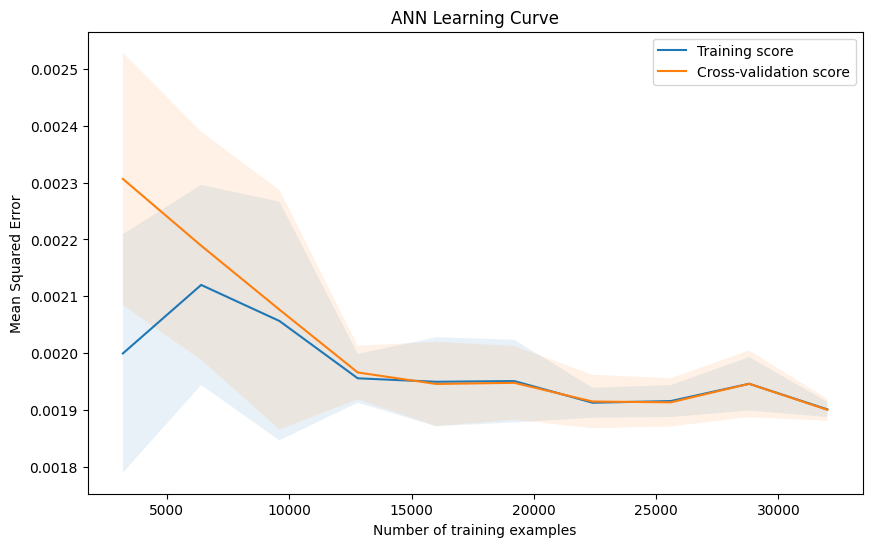

In [ ]:
# ANN Learning Curve for Top 5
train_sizes, train_scores, test_scores = learning_curve(
    ann_top5_model, X_train, Y_train, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='neg_mean_squared_error'
)

train_scores = -train_scores
test_scores = -test_scores

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel('Number of training examples')
plt.ylabel('Mean Squared Error')
plt.title('ANN Learning Curve')
plt.legend()
plt.show()

# **Artificial Neural Network with Hyperparameter Tuning using the Top 10 Best Features**

In [ ]:
X = production_data[['DamsQuality', 'IneffectiveDisasterPreparedness', 'Deforestation',
                     'PoliticalFactors', 'Watersheds', 'TopographyDrainage',
                     'Landslides', 'RiverManagement', 'MonsoonIntensity', 'WetlandLoss']]
y = production_data['FloodProbability']

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Data Shape: X_train: {X_train.shape}, Y_train: {Y_train.shape}")
print(f"Testing Data Shape: X_test: {X_test.shape}, Y_test: {Y_test.shape}")

Training Data Shape: X_train: (40000, 10), Y_train: (40000,)
Testing Data Shape: X_test: (10000, 10), Y_test: (10000,)


In [ ]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Instantiate the ANN model with the best parameters from your previous tuning
best_params = {'alpha': 0.001, 'batch_size': 64,
               'hidden_layer_sizes': (100,), 'learning_rate_init': 0.01,
               'solver':'adam', 'activation': 'relu',
               'max_iter':500,}
ann_top10_model = MLPRegressor(**best_params)

# Train the model
ann_top10_model.fit(X_train, Y_train)

MLPRegressor(alpha=0.001, batch_size=64, learning_rate_init=0.01, max_iter=500)

In [ ]:
# Make predictions on the test set
top10_Y_pred = ann_top10_model.predict(X_test)

# Evaluate the model using appropriate metrics
top10_mse = mean_squared_error(Y_test, top10_Y_pred)
top10_mae = mean_absolute_error(Y_test, top10_Y_pred)
top10_r2 = r2_score(Y_test, top10_Y_pred)

print(f'ANN Using Top 10 Features Test MSE: {top10_mse}')
print(f'ANN Using Top 10 Features Test Test MAE: {top10_mae}')
print(f'ANN Using Top 10 Features Test Test R²: {top10_r2}')

ANN Using Top 10 Features Test MSE: 0.0012573865445571373
ANN Using Top 10 Features Test Test MAE: 0.028240425103894323
ANN Using Top 10 Features Test Test R²: 0.49514424560066406


In [ ]:
# Comparing Predicted vs. Actual Values
comparison = pd.DataFrame({
    'Actual Flood Probability': Y_test,
    'Predicted Flood Probability': top10_Y_pred
})
print(comparison.head())

       Actual Flood Probability  Predicted Flood Probability
33553                     0.455                     0.472082
9427                      0.495                     0.496747
199                       0.470                     0.480367
12447                     0.460                     0.463971
39489                     0.465                     0.461451


In [ ]:
# Display Predictions
predictions = ann_top10_model.predict(scaler.transform(X))
production_data['PredictedFloodProbability(%)'] = predictions
print(production_data[['PredictedFloodProbability(%)']].head())

   PredictedFloodProbability(%)
0                      0.494336
1                      0.501302
2                      0.498108
3                      0.519907
4                      0.477119


In [ ]:
# Calculate permutation importance
perm_importance = permutation_importance(
    ann_top10_model, X_test, Y_test, scoring='neg_mean_squared_error', n_repeats=10, random_state=42
)

ann_feature_names = list(X.columns)
ann_importances = perm_importance.importances_mean

ann_importance_series = pd.Series(ann_importances, index=ann_feature_names)

fig_ann = px.bar(ann_importance_series.sort_values(ascending=False),
                title="Artificial Neural Network with Hyperparameter Tuning using the Top 10 Best Features",
                labels={'index': 'Features', 'value': 'Importance'},
                text=ann_importance_series.sort_values(ascending=False).values)

fig_ann.update_traces(texttemplate='%{text:.5f}', textposition='outside')
fig_ann.show()

ann_importance_series = ann_importance_series.sort_values(ascending=False)

# Print the feature importance type and value
for feature_name, importance_value in ann_importance_series.items():
    print(f"{feature_name}: {importance_value:.6f}")

IneffectiveDisasterPreparedness: 0.000296
DamsQuality: 0.000285
WetlandLoss: 0.000270
Watersheds: 0.000243
RiverManagement: 0.000241
TopographyDrainage: 0.000238
MonsoonIntensity: 0.000235
Deforestation: 0.000231
PoliticalFactors: 0.000220
Landslides: 0.000205


In [ ]:
# Interactive Plot for Actual vs. Predicted Values
fig = px.scatter(
    x=Y_test, y=top10_Y_pred,
    labels={'x': 'Actual Flood Probability', 'y': 'Predicted Flood Probability'},
    title='ANN Tuned Top 10: Actual vs. Predicted Flood Probability'
)
fig.add_shape(
    type='line',
    line=dict(dash='dash', color='red'),
    x0=Y_test.min(), y0=Y_test.min(),
    x1=Y_test.max(), y1=Y_test.max()
)
fig.show()

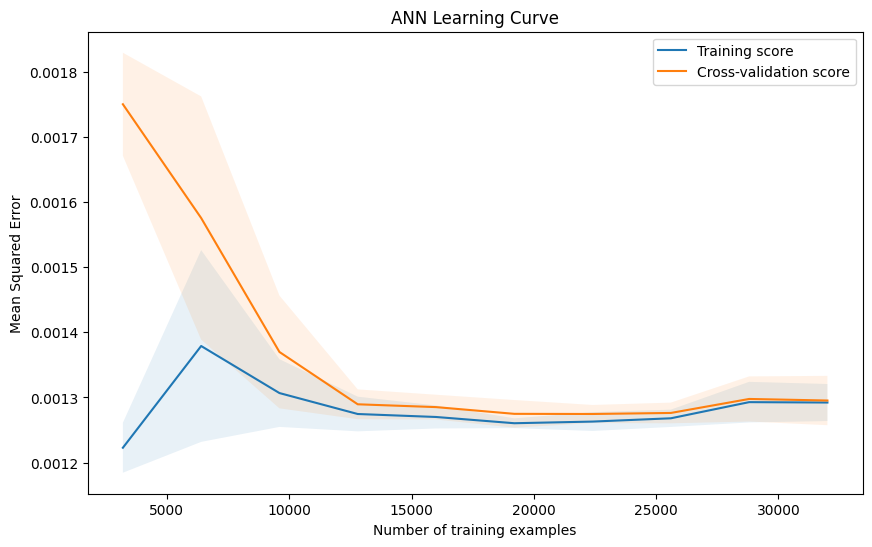

In [ ]:
# ANN Learning Curve for Top 10
train_sizes, train_scores, test_scores = learning_curve(
    ann_top10_model, X_train, Y_train, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='neg_mean_squared_error'
)

train_scores = -train_scores
test_scores = -test_scores

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel('Number of training examples')
plt.ylabel('Mean Squared Error')
plt.title('ANN Learning Curve')
plt.legend()
plt.show()

# **Artificial Neural Network with Hyperparameter Tuning using the Top 15 Best Features**

In [ ]:
X = production_data.drop(['Urbanization', 'ClimateChange', 'Encroachments',
                          'DrainageSystems', 'CoastalVulnerability', 'FloodProbability'], axis = 1)
y = production_data['FloodProbability']

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Data Shape: X_train: {X_train.shape}, Y_train: {Y_train.shape}")
print(f"Testing Data Shape: X_test: {X_test.shape}, Y_test: {Y_test.shape}")

Training Data Shape: X_train: (40000, 15), Y_train: (40000,)
Testing Data Shape: X_test: (10000, 15), Y_test: (10000,)


In [ ]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Instantiate the ANN model with the best parameters from your previous tuning
best_params = {'alpha': 0.001, 'batch_size': 64,
               'hidden_layer_sizes': (100,), 'learning_rate_init': 0.01,
               'solver':'adam', 'activation': 'relu',
               'max_iter':500,}
ann_top15_model = MLPRegressor(**best_params)

# Train the model
ann_top15_model.fit(X_train, Y_train)

MLPRegressor(alpha=0.001, batch_size=64, learning_rate_init=0.01, max_iter=500)

In [ ]:
# Make predictions on the test set
top15_Y_pred = ann_top15_model.predict(X_test)

# Evaluate the model using appropriate metrics
top15_mse = mean_squared_error(Y_test, top15_Y_pred)
top15_mae = mean_absolute_error(Y_test, top15_Y_pred)
top15_r2 = r2_score(Y_test, top15_Y_pred)

print(f'ANN Using Top 15 Features Test MSE: {top15_mse}')
print(f'ANN Using Top 15 Features Test Test MAE: {top15_mae}')
print(f'ANN Using Top 15 Features Test Test R²: {top15_r2}')

ANN Using Top 15 Features Test MSE: 0.000706012139602928
ANN Using Top 15 Features Test Test MAE: 0.02102791647641509
ANN Using Top 15 Features Test Test R²: 0.7165276717034819


In [ ]:
# Comparing Predicted vs. Actual Values
comparison = pd.DataFrame({
    'Actual Flood Probability': Y_test,
    'Predicted Flood Probability': top15_Y_pred
})
print(comparison.head())

       Actual Flood Probability  Predicted Flood Probability
33553                     0.455                     0.460404
9427                      0.495                     0.483580
199                       0.470                     0.462578
12447                     0.460                     0.453511
39489                     0.465                     0.460636


In [ ]:
# Display Predictions
predictions = ann_top15_model.predict(scaler.transform(X))
production_data['PredictedFloodProbability(%)'] = predictions
print(production_data[['PredictedFloodProbability(%)']].head())

   PredictedFloodProbability(%)
0                      0.448590
1                      0.450169
2                      0.477670
3                      0.548745
4                      0.453513


In [ ]:
# Calculate permutation importance
perm_importance = permutation_importance(
    ann_top15_model, X_test, Y_test, scoring='neg_mean_squared_error', n_repeats=10, random_state=42
)

ann_feature_names = list(X.columns)
ann_importances = perm_importance.importances_mean

ann_importance_series = pd.Series(ann_importances, index=ann_feature_names)

fig_ann = px.bar(ann_importance_series.sort_values(ascending=False),
                title="Artificial Neural Network with Hyperparameter Tuning using the Top 15 Best Features",
                labels={'index': 'Features', 'value': 'Importance'},
                text=ann_importance_series.sort_values(ascending=False).values)

fig_ann.update_traces(texttemplate='%{text:.5f}', textposition='outside')
fig_ann.show()

ann_importance_series = ann_importance_series.sort_values(ascending=False)

# Print the feature importance type and value
for feature_name, importance_value in ann_importance_series.items():
    print(f"{feature_name}: {importance_value:.6f}")

IneffectiveDisasterPreparedness: 0.000257
WetlandLoss: 0.000241
TopographyDrainage: 0.000230
MonsoonIntensity: 0.000229
InadequatePlanning: 0.000226
Landslides: 0.000221
DamsQuality: 0.000217
AgriculturalPractices: 0.000210
Watersheds: 0.000208
DeterioratingInfrastructure: 0.000201
Deforestation: 0.000198
PopulationScore: 0.000189
RiverManagement: 0.000186
PoliticalFactors: 0.000174
Siltation: 0.000166


In [ ]:
# Interactive Plot for Actual vs. Predicted Values
fig = px.scatter(
    x=Y_test, y=top15_Y_pred,
    labels={'x': 'Actual Flood Probability', 'y': 'Predicted Flood Probability'},
    title='ANN Tuned Top 15: Actual vs. Predicted Flood Probability'
)
fig.add_shape(
    type='line',
    line=dict(dash='dash', color='red'),
    x0=Y_test.min(), y0=Y_test.min(),
    x1=Y_test.max(), y1=Y_test.max()
)
fig.show()

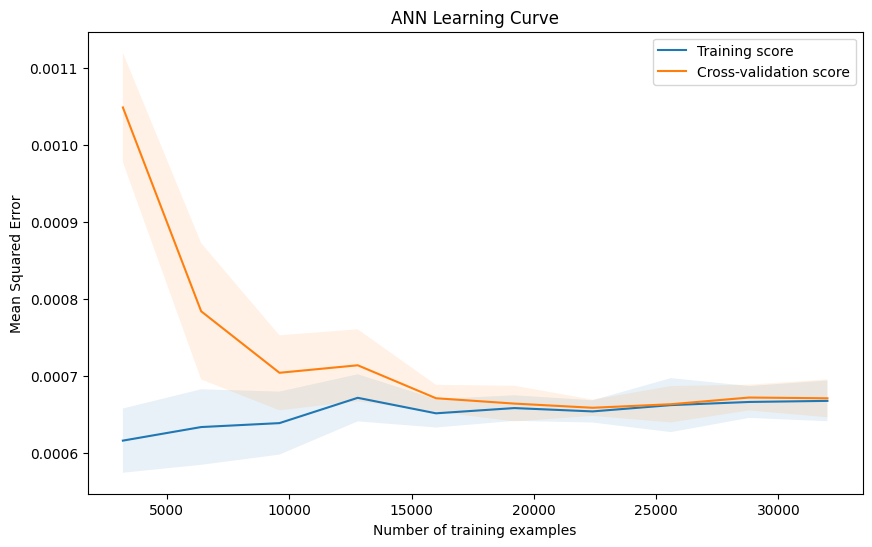

In [ ]:
# ANN Learning Curve for Top 15
train_sizes, train_scores, test_scores = learning_curve(
    ann_top15_model, X_train, Y_train, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='neg_mean_squared_error'
)

train_scores = -train_scores
test_scores = -test_scores

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel('Number of training examples')
plt.ylabel('Mean Squared Error')
plt.title('ANN Learning Curve')
plt.legend()
plt.show()